Data Source:

```
https://www.kaggle.com/code/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations
```



## Data Preparation

In [1]:
!pip install opendatasets

username	"username" <br>
key	"****"

In [2]:
import opendatasets as od
import pandas as pd
import os
import glob

od.download(
    "https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: milinpear
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand


100%|██████████| 1.25M/1.25M [00:00<00:00, 482MB/s]

In [55]:
##load data
file_path = "hotel-booking-demand/hotel_bookings.csv"
df = pd.read_csv(file_path)

df.shape ##total records

(119390, 32)

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## EDA

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [56]:
df['adults'].value_counts()

,count
adults,
2,89680
1,23027
3,6202
0,403
4,62
26,5
5,2
27,2
20,2


In [10]:
#check record that adults = 0 and assign as 1
df.loc[df['adults'] == 0, 'adults'] = 1
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [11]:
#check null value
#have 4 features that contain null value
df.isnull().sum().sort_values(ascending=False)[:5]

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0


In [12]:
#impute null children with 0 and impute null country with "Not identify"
df['children'].fillna(0, inplace=True)
df['country'].fillna('Not identify', inplace=True)

/tmp/ipython-input-841296057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
/tmp/ipython-input-841296057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [13]:
#change children column type to int instead of float
df['children'] = df['children'].astype('int64')

In [14]:
#check null value again
df.isnull().sum().sort_values(ascending=False)[:5]

,0
company,112593
agent,16340
hotel,0
is_canceled,0
arrival_date_month,0


In [15]:
#drop those column that hint the cancellation reservation_status and reservation_status_date
df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)
#drop company and agent; company has null value more than 50% and agent is not that important for the model
df.drop(['company', 'agent'], axis=1, inplace=True)

In [18]:
# add new column call total_guest that sum up all adult + children + baby following DA
df['total_guest'] = df['adults'] + df['babies']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

/tmp/ipython-input-2527457806.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_canceled', data=df, palette='viridis')


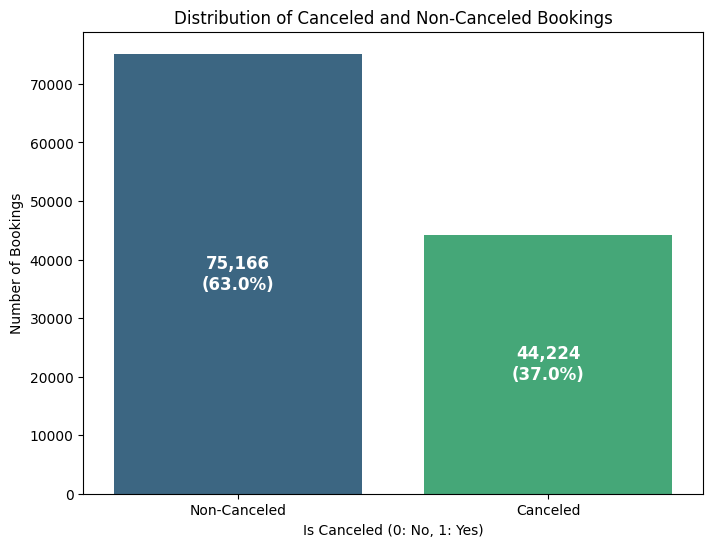

In [20]:
#plot graph to see non-cancel and cancel booking. To have a better split for train and test
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_canceled', data=df, palette='viridis')
plt.title('Distribution of Canceled and Non-Canceled Bookings')
plt.xlabel('Is Canceled (0: No, 1: Yes)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['Non-Canceled', 'Canceled'])

total = len(df)

# Add count and percentage labels inside each bar (centered)
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    ax.annotate(f'{count:,}\n({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

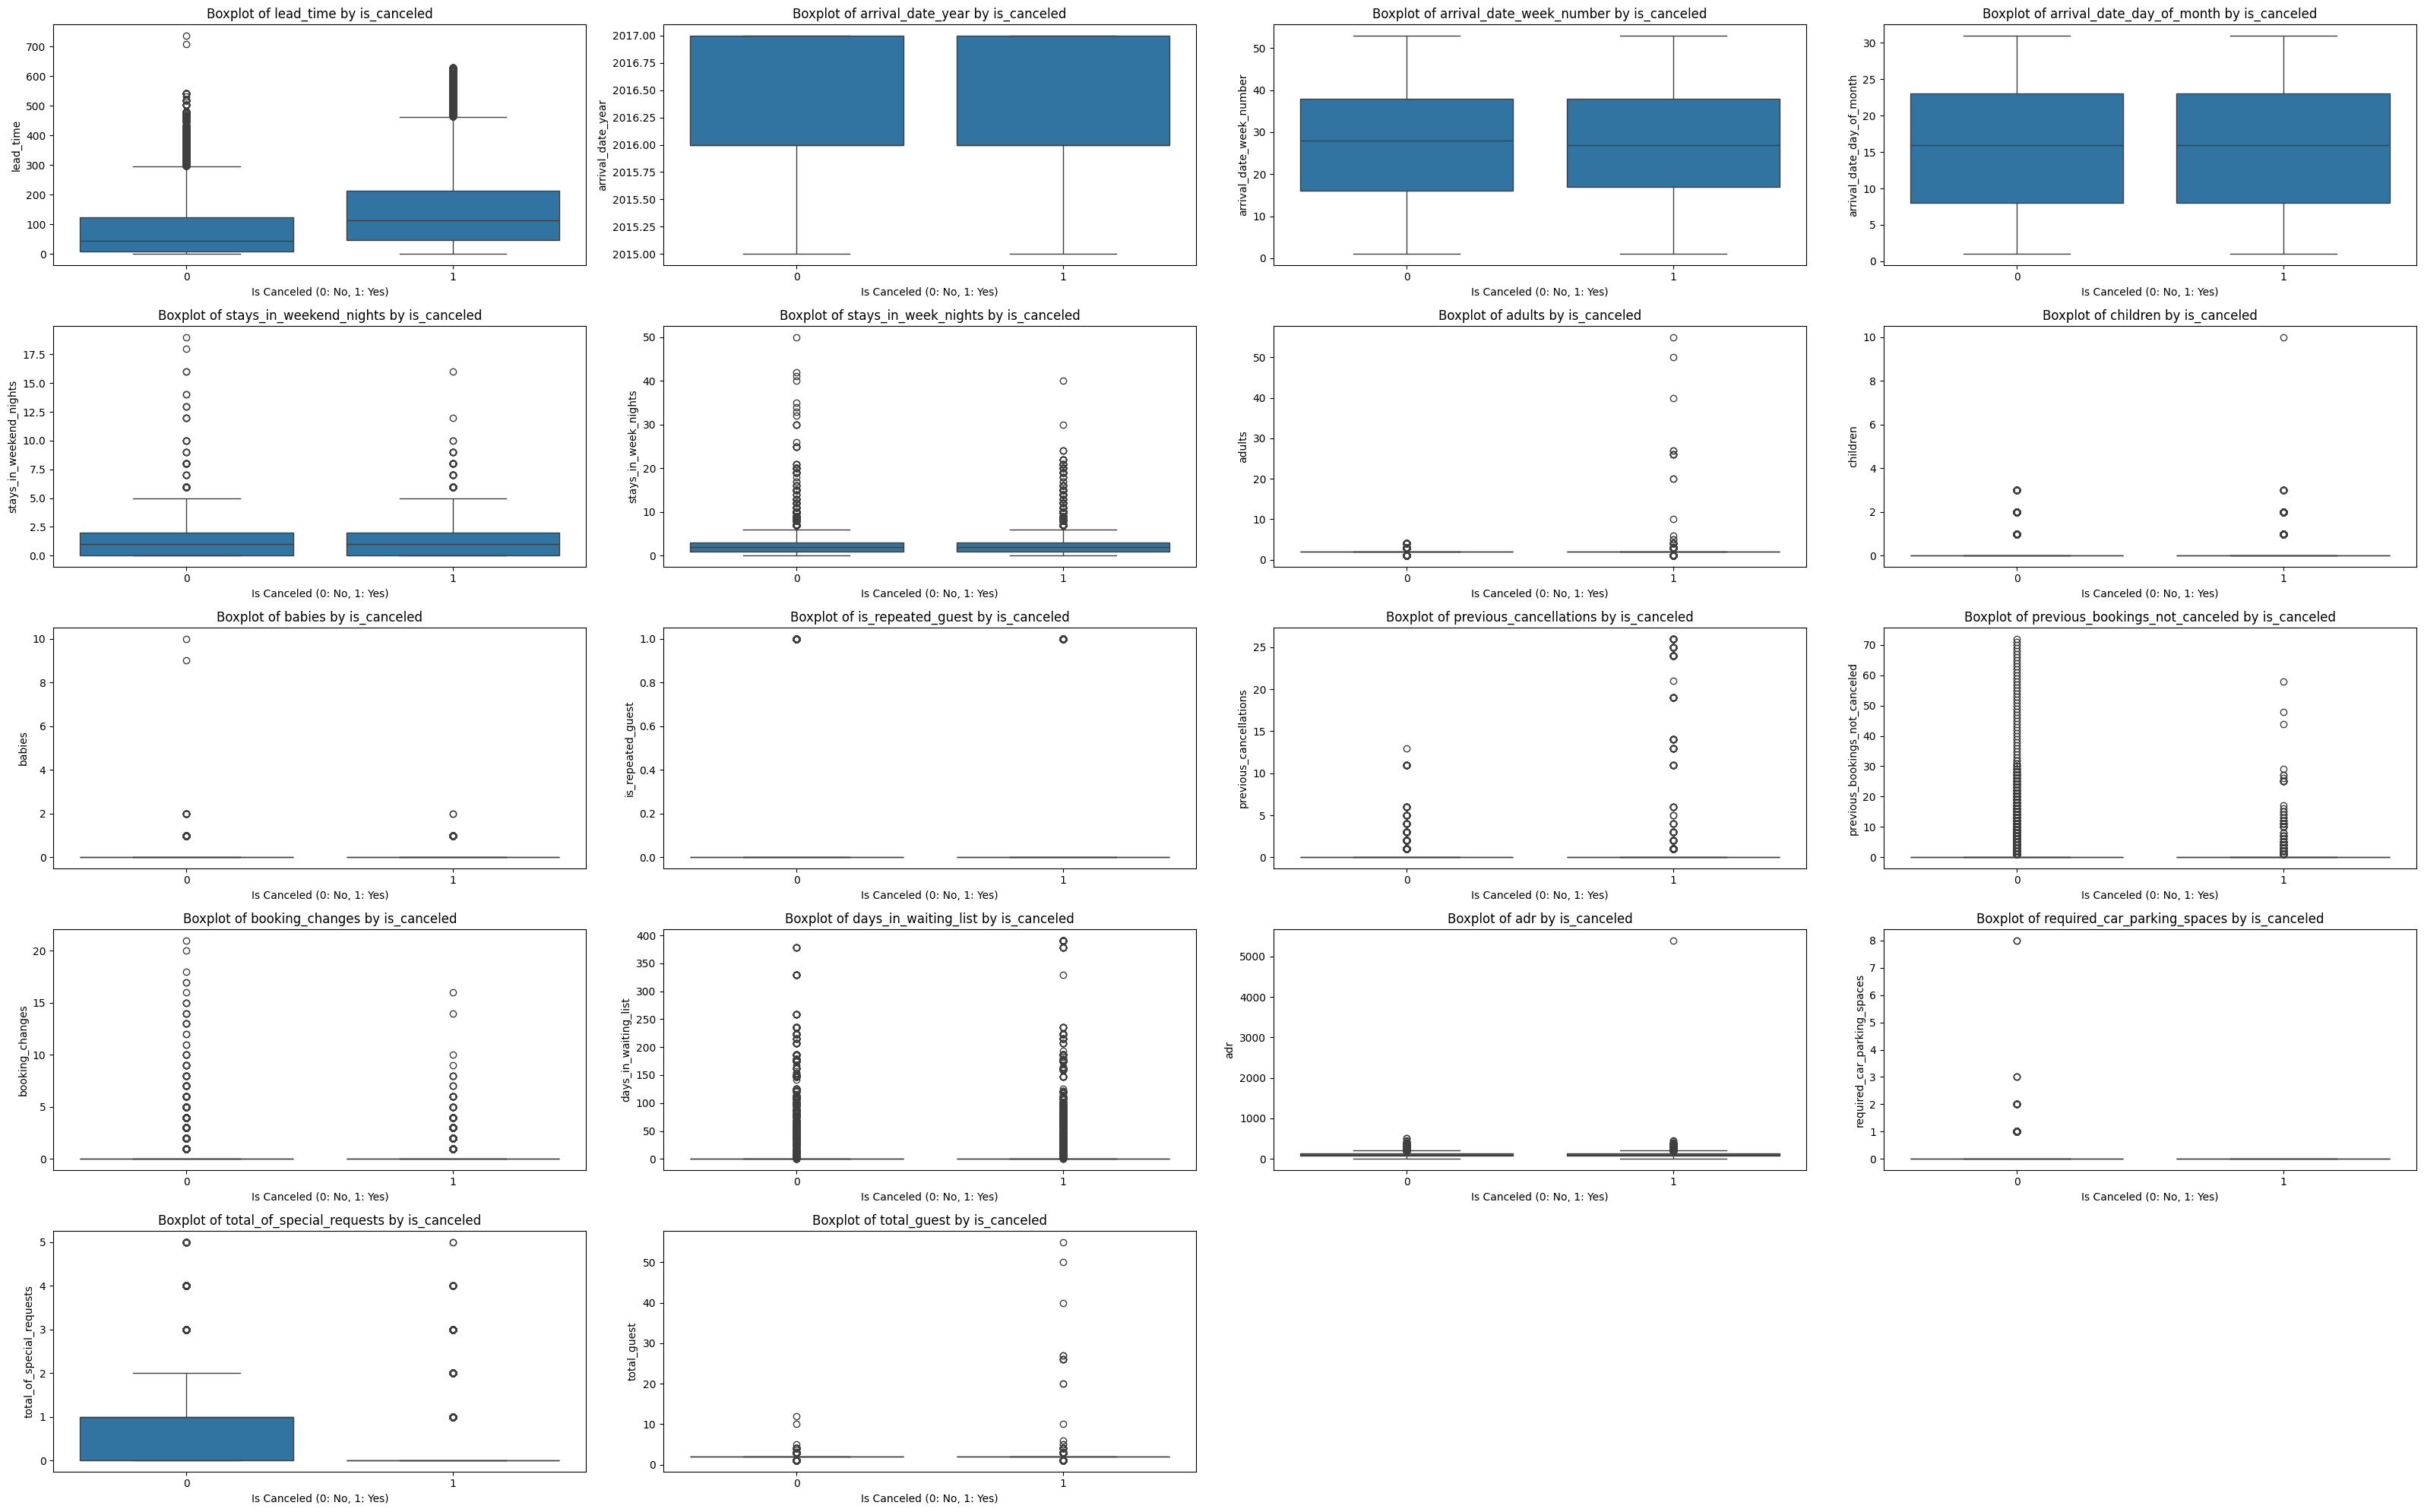

In [21]:
#create fig of boxplot for numeric column

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['is_canceled']  # add/remove as needed
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

#Set up the subplot grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Corrected calculation for n_rows

plt.figure(figsize=(n_cols * 8, n_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x='is_canceled', y=col)
    plt.title(f'Boxplot of {col} by is_canceled')
    plt.xlabel('Is Canceled (0: No, 1: Yes)')
    plt.tight_layout()

plt.show()
#those that boxplot show identical --> visual hint that these features may not be strong predictors

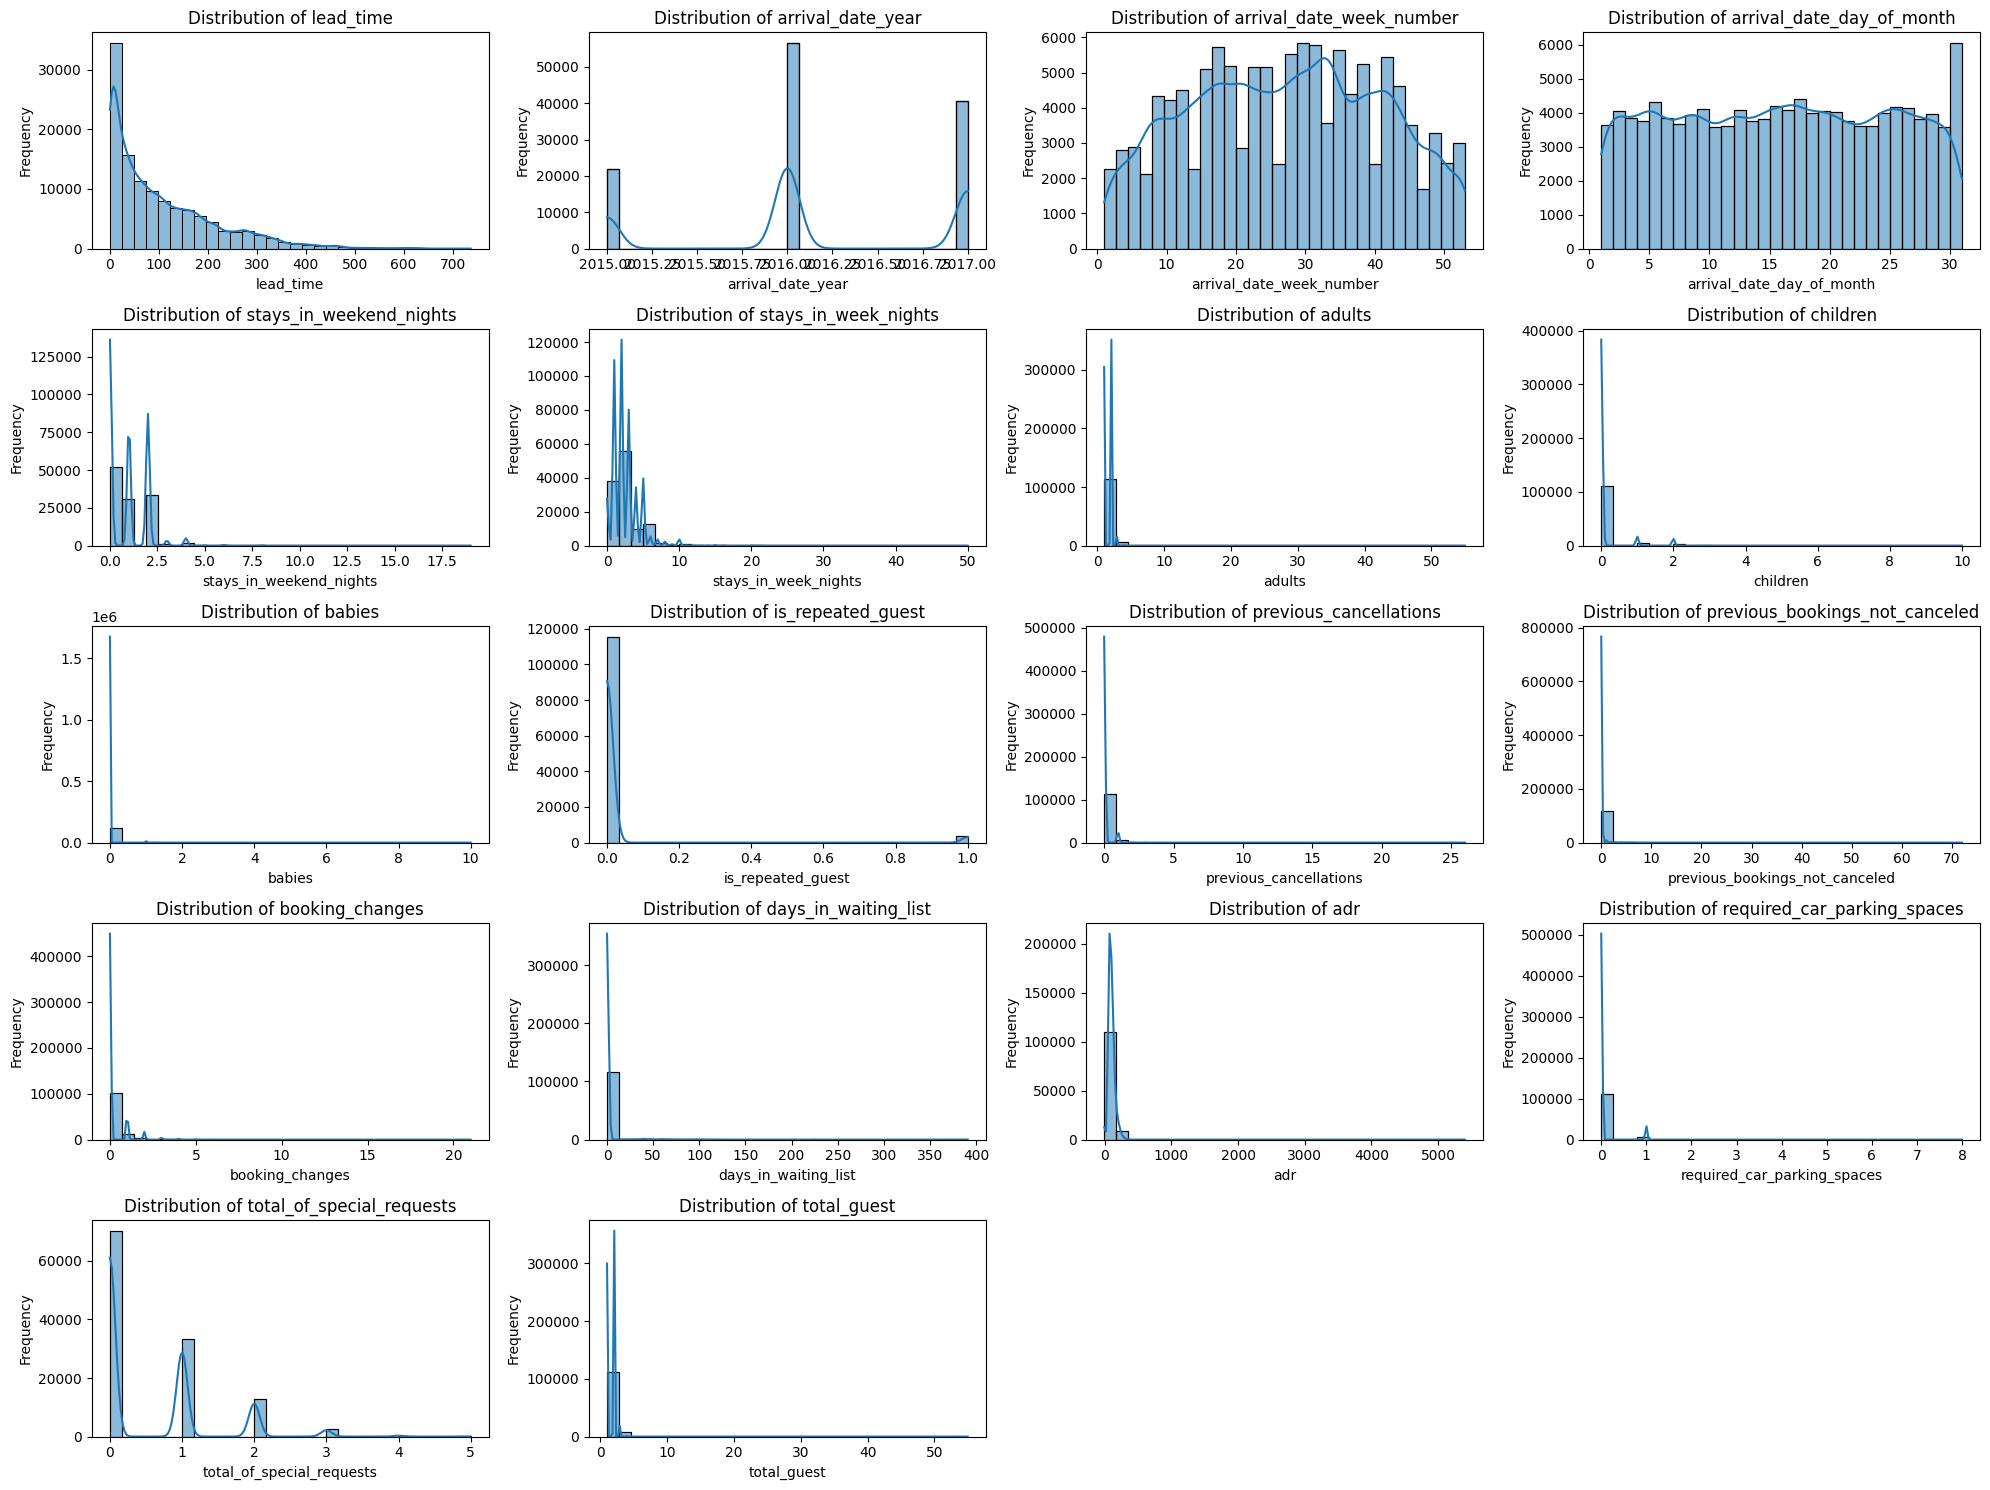

In [22]:
#show distribution graph for each numeric feature
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [24]:
#Remove 5000 ADR outliers
df_no_outlier = df[df['adr'] <= 5000].reset_index(drop=True)

print(f"Removed {len(df) - len(df_no_outlier)} rows with ADR above 5000")

Removed 1 rows with ADR above 5000


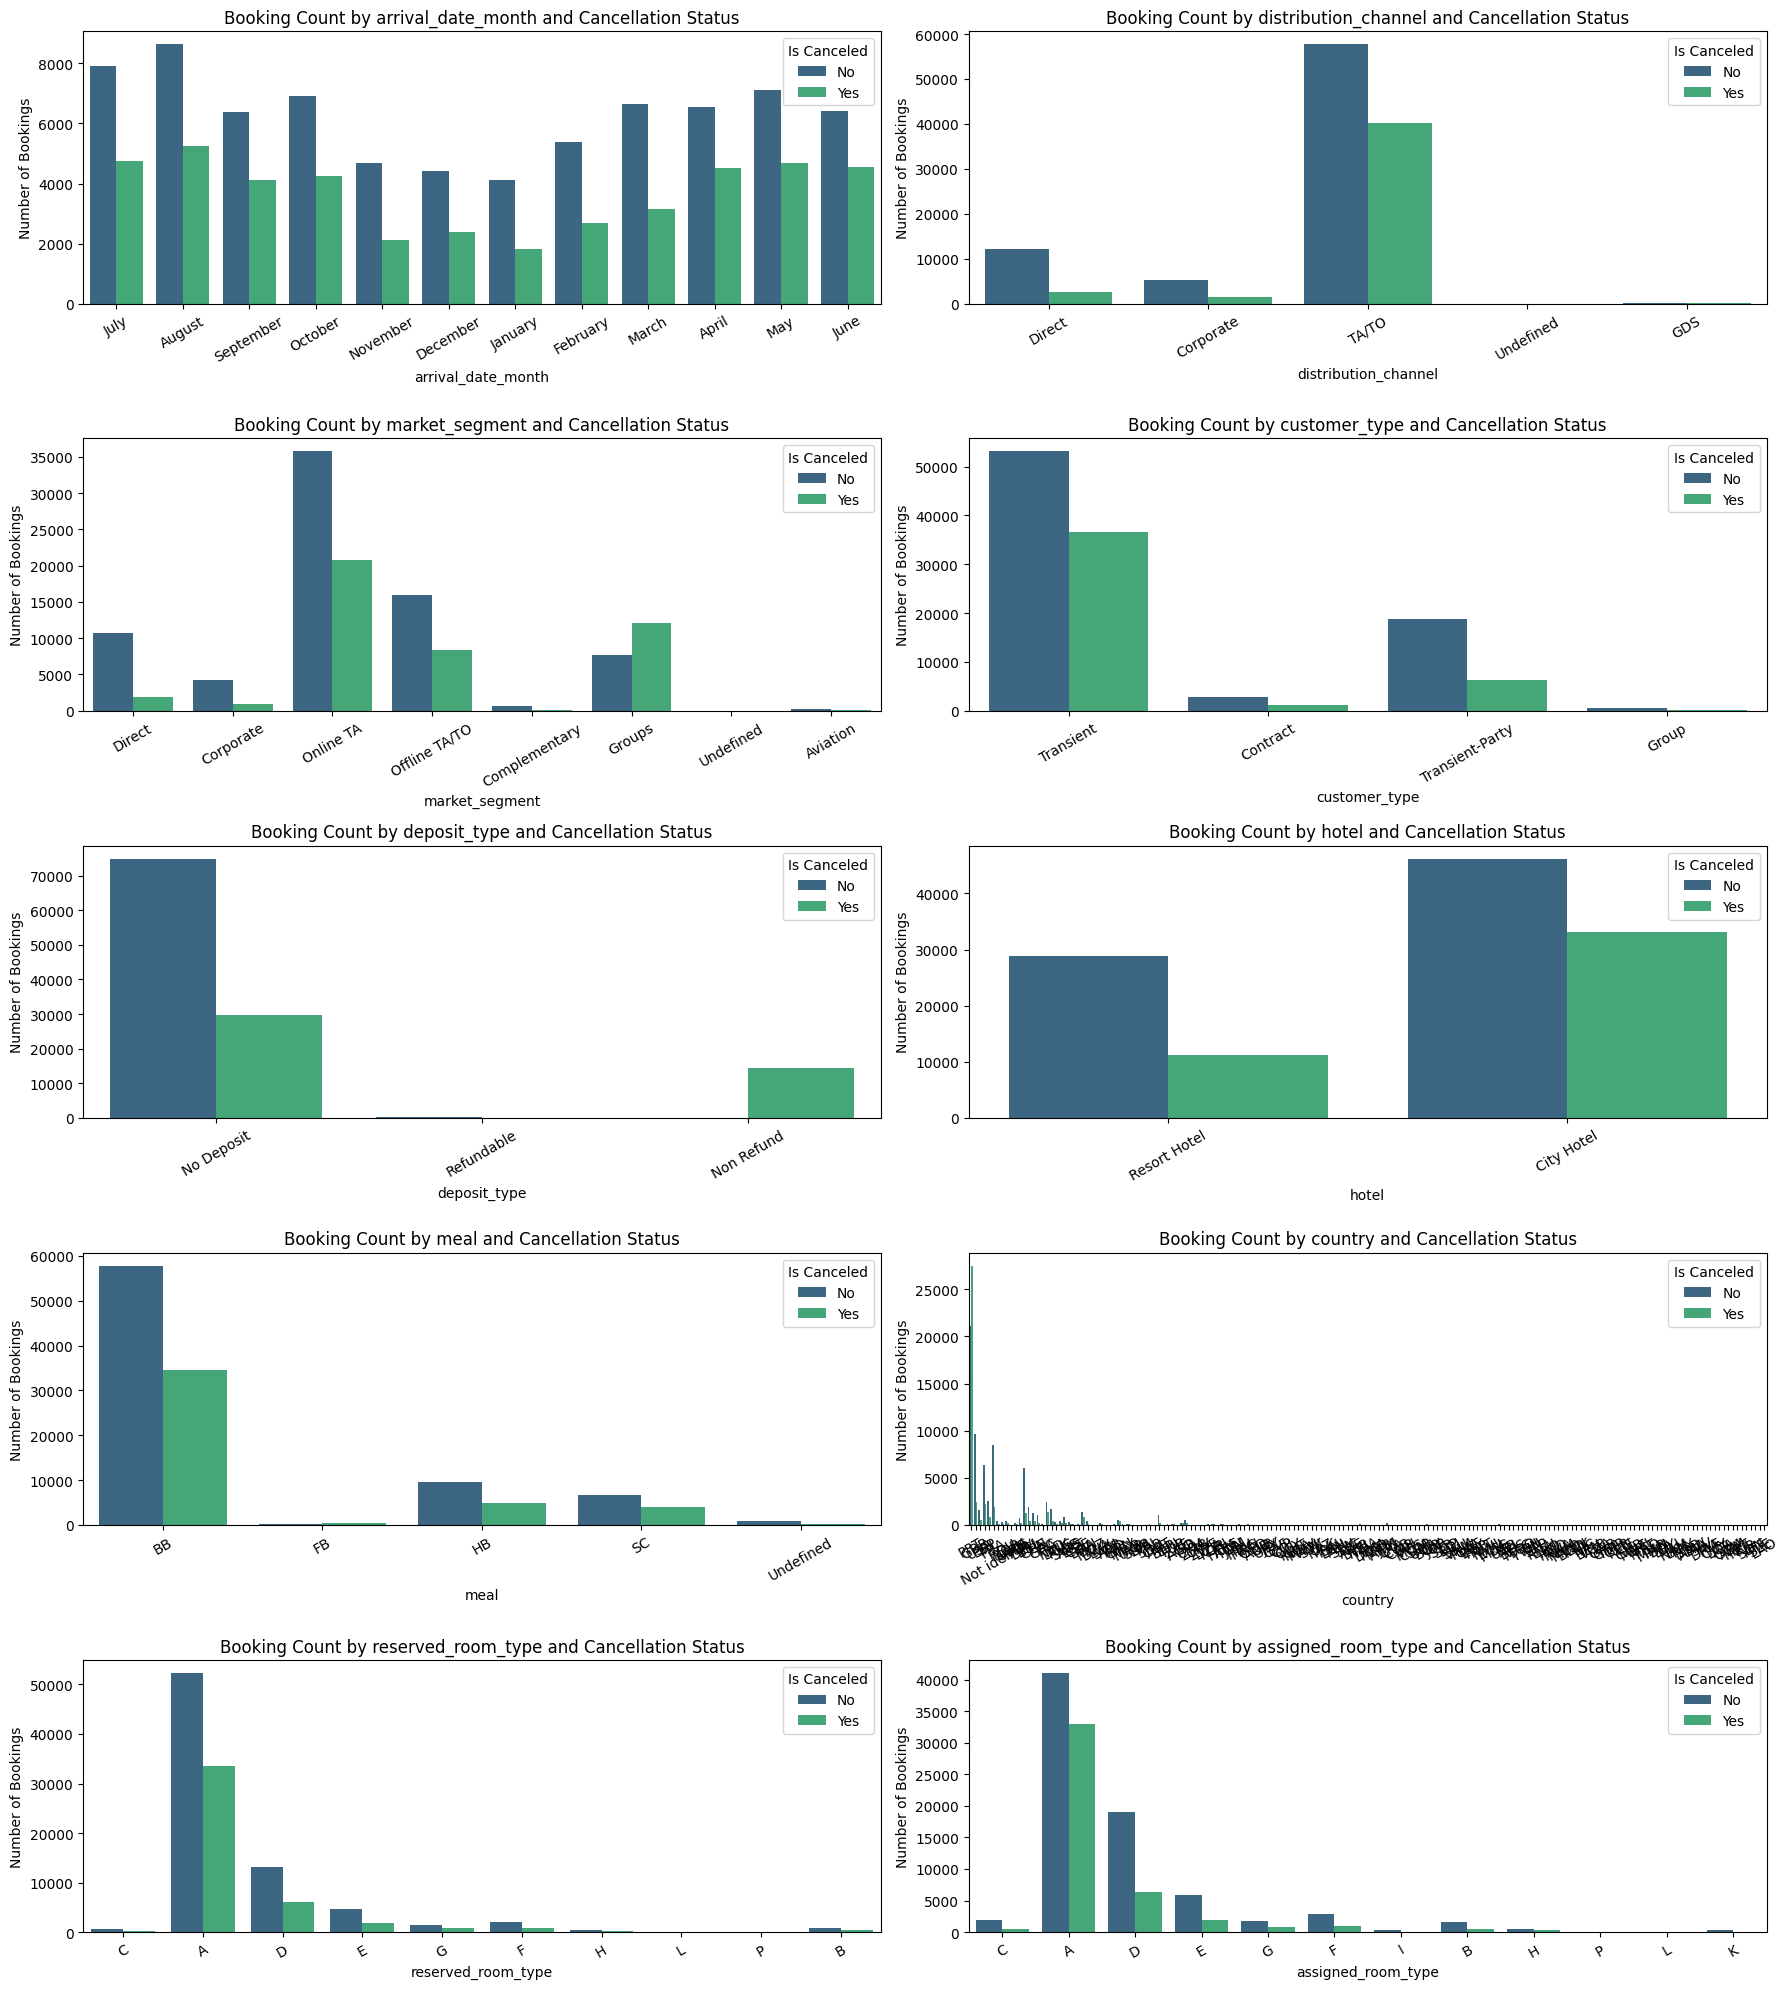

In [25]:
#categorical feature

categorical_cols = [
    "arrival_date_month", "distribution_channel", "market_segment",
    "customer_type", "deposit_type", "hotel", "meal", "country", "reserved_room_type","assigned_room_type"
]

n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 9, n_rows * 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df_no_outlier, x=col, hue='is_canceled', palette='viridis')
    plt.title(f'Booking Count by {col} and Cancellation Status')
    plt.xlabel(col)
    plt.ylabel('Number of Bookings')
    plt.legend(title='Is Canceled', labels=['No', 'Yes'])
    plt.xticks(rotation=30)
    plt.tight_layout()

plt.show()

/tmp/ipython-input-2634948370.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['cancel_rate']*100, palette='viridis', ax=ax)
/tmp/ipython-input-2634948370.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
/tmp/ipython-input-2634948370.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['cancel_rate']*100, palette='viridis', ax=ax)
/tmp/ipython-input-2634948370.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


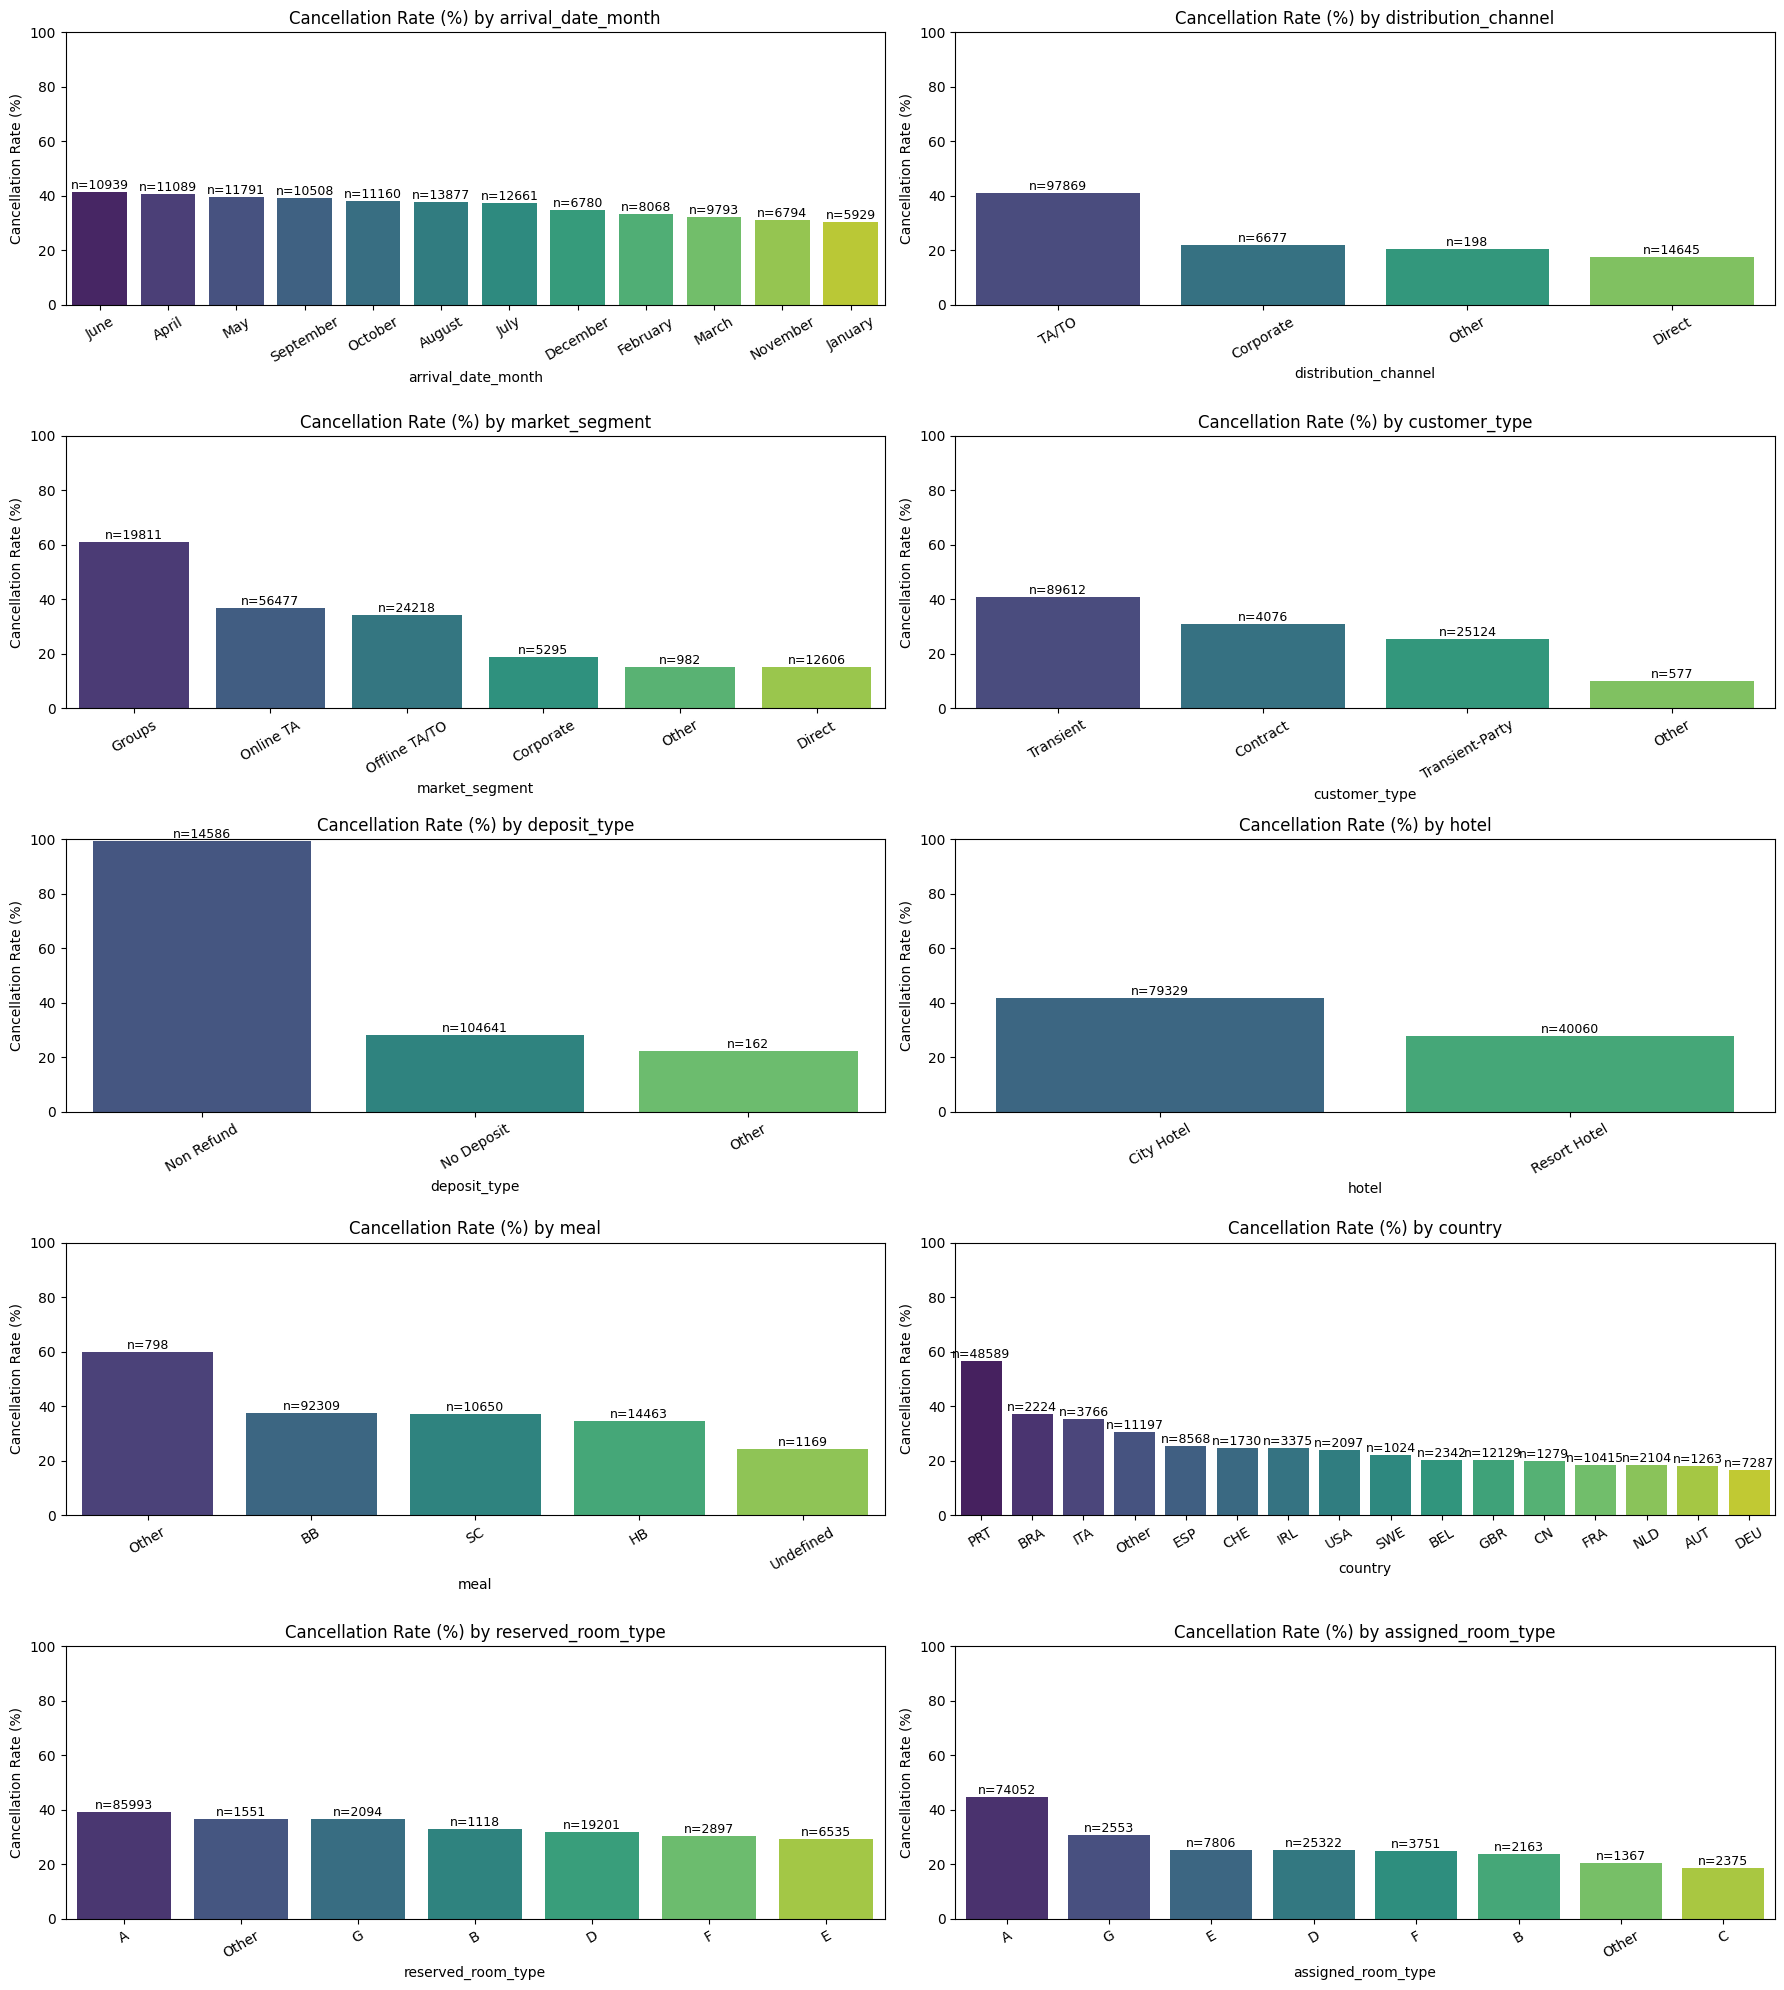

In [26]:
categorical_cols = [
    "arrival_date_month", "distribution_channel", "market_segment",
    "customer_type", "deposit_type", "hotel", "meal", "country",
    "reserved_room_type", "assigned_room_type"
]

def plot_cancellation_rate(df, col, ax, top_n=15, min_count=1000):
    # Group rare categories
    value_counts = df[col].value_counts()
    if len(value_counts) > top_n:
        top_categories = value_counts.nlargest(top_n).index
        df = df.copy()
        df[col] = df[col].where(df[col].isin(top_categories), other='Other')

    # Calculate cancellation rate and count per category
    summary = (
        df.groupby(col)['is_canceled']
        .agg(['mean', 'count'])
        .rename(columns={'mean': 'cancel_rate'})
        .sort_values('cancel_rate', ascending=False)
    )

    # Optionally group categories with very low count into 'Other'
    if min_count:
        rare = summary[summary['count'] < min_count].index
        df[col] = df[col].where(~df[col].isin(rare), other='Other')
        summary = (
            df.groupby(col)['is_canceled']
            .agg(['mean', 'count'])
            .rename(columns={'mean': 'cancel_rate'})
            .sort_values('cancel_rate', ascending=False)
        )

    # Plot on the provided axis
    sns.barplot(x=summary.index, y=summary['cancel_rate']*100, palette='viridis', ax=ax)
    ax.set_title(f'Cancellation Rate (%) by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Cancellation Rate (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.set_ylim(0, 100)
    # Annotate with counts
    for i, (rate, count) in enumerate(zip(summary['cancel_rate'], summary['count'])):
        ax.text(i, rate*100, f'n={count}', ha='center', va='bottom', fontsize=9)

# Set up the subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 9, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot for each categorical feature
for i, col in enumerate(categorical_cols):
    plot_cancellation_rate(df_no_outlier, col, axes[i], top_n=15, min_count=1000)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
df_no_outlier[df_no_outlier['deposit_type'] == 'Non Refund']['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
1,0.993624
0,0.006376


In [28]:
df_no_outlier[df_no_outlier['deposit_type'] == 'Non Refund']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guest
2133,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,A,A,0,Non Refund,0,Transient,36.05,0,0,2
2134,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,A,A,0,Non Refund,0,Transient,36.05,0,0,2
2135,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,A,A,0,Non Refund,0,Transient,36.05,0,0,2
2136,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,A,A,0,Non Refund,0,Transient,36.05,0,0,2
2141,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,A,A,0,Non Refund,0,Transient,36.05,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95423,City Hotel,0,172,2016,August,34,16,0,3,1,...,E,E,1,Non Refund,0,Transient-Party,106.00,0,0,1
95935,City Hotel,0,178,2016,August,35,22,1,3,1,...,E,E,1,Non Refund,0,Transient-Party,106.00,0,0,1
96192,City Hotel,0,198,2016,August,35,25,2,3,2,...,A,A,0,Non Refund,0,Transient-Party,72.25,0,0,2
96231,City Hotel,0,186,2016,August,35,26,2,2,2,...,B,B,0,Non Refund,0,Transient-Party,83.83,0,0,2


In [29]:
# Check for any duplicated rows (all columns)
num_duplicates = df_no_outlier.duplicated().sum()
print(f"Number of fully duplicated rows: {num_duplicates}")

Number of fully duplicated rows: 32280


In [30]:
# Drop fully duplicated rows, keeping only the first occurrence
df_no_outlier = df_no_outlier.drop_duplicates(keep='first')

print(f"Shape after dropping duplicates: {df_no_outlier.shape}")

Shape after dropping duplicates: (87109, 29)


/tmp/ipython-input-1047566299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_canceled', data=df_no_outlier, palette='viridis')


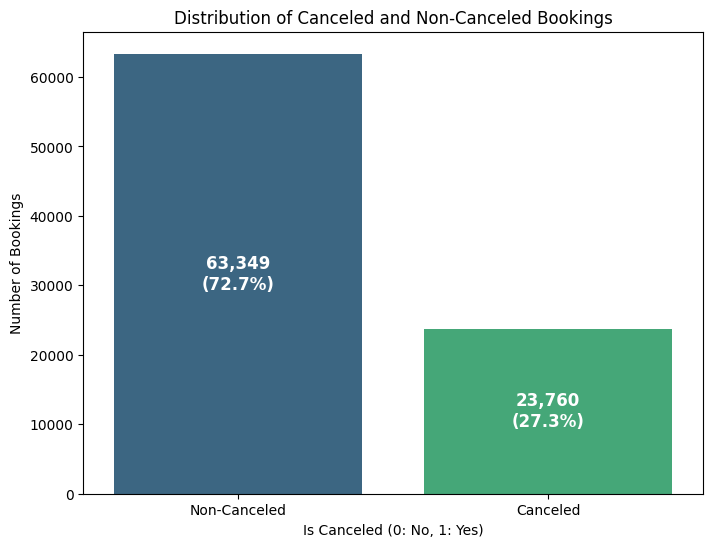

In [31]:
#plot graph to see non-cancel and cancel booking. To have a better split for train and test

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_canceled', data=df_no_outlier, palette='viridis')
plt.title('Distribution of Canceled and Non-Canceled Bookings')
plt.xlabel('Is Canceled (0: No, 1: Yes)')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['Non-Canceled', 'Canceled'])

total = len(df_no_outlier)

# Add count and percentage labels inside each bar (centered)
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    ax.annotate(f'{count:,}\n({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

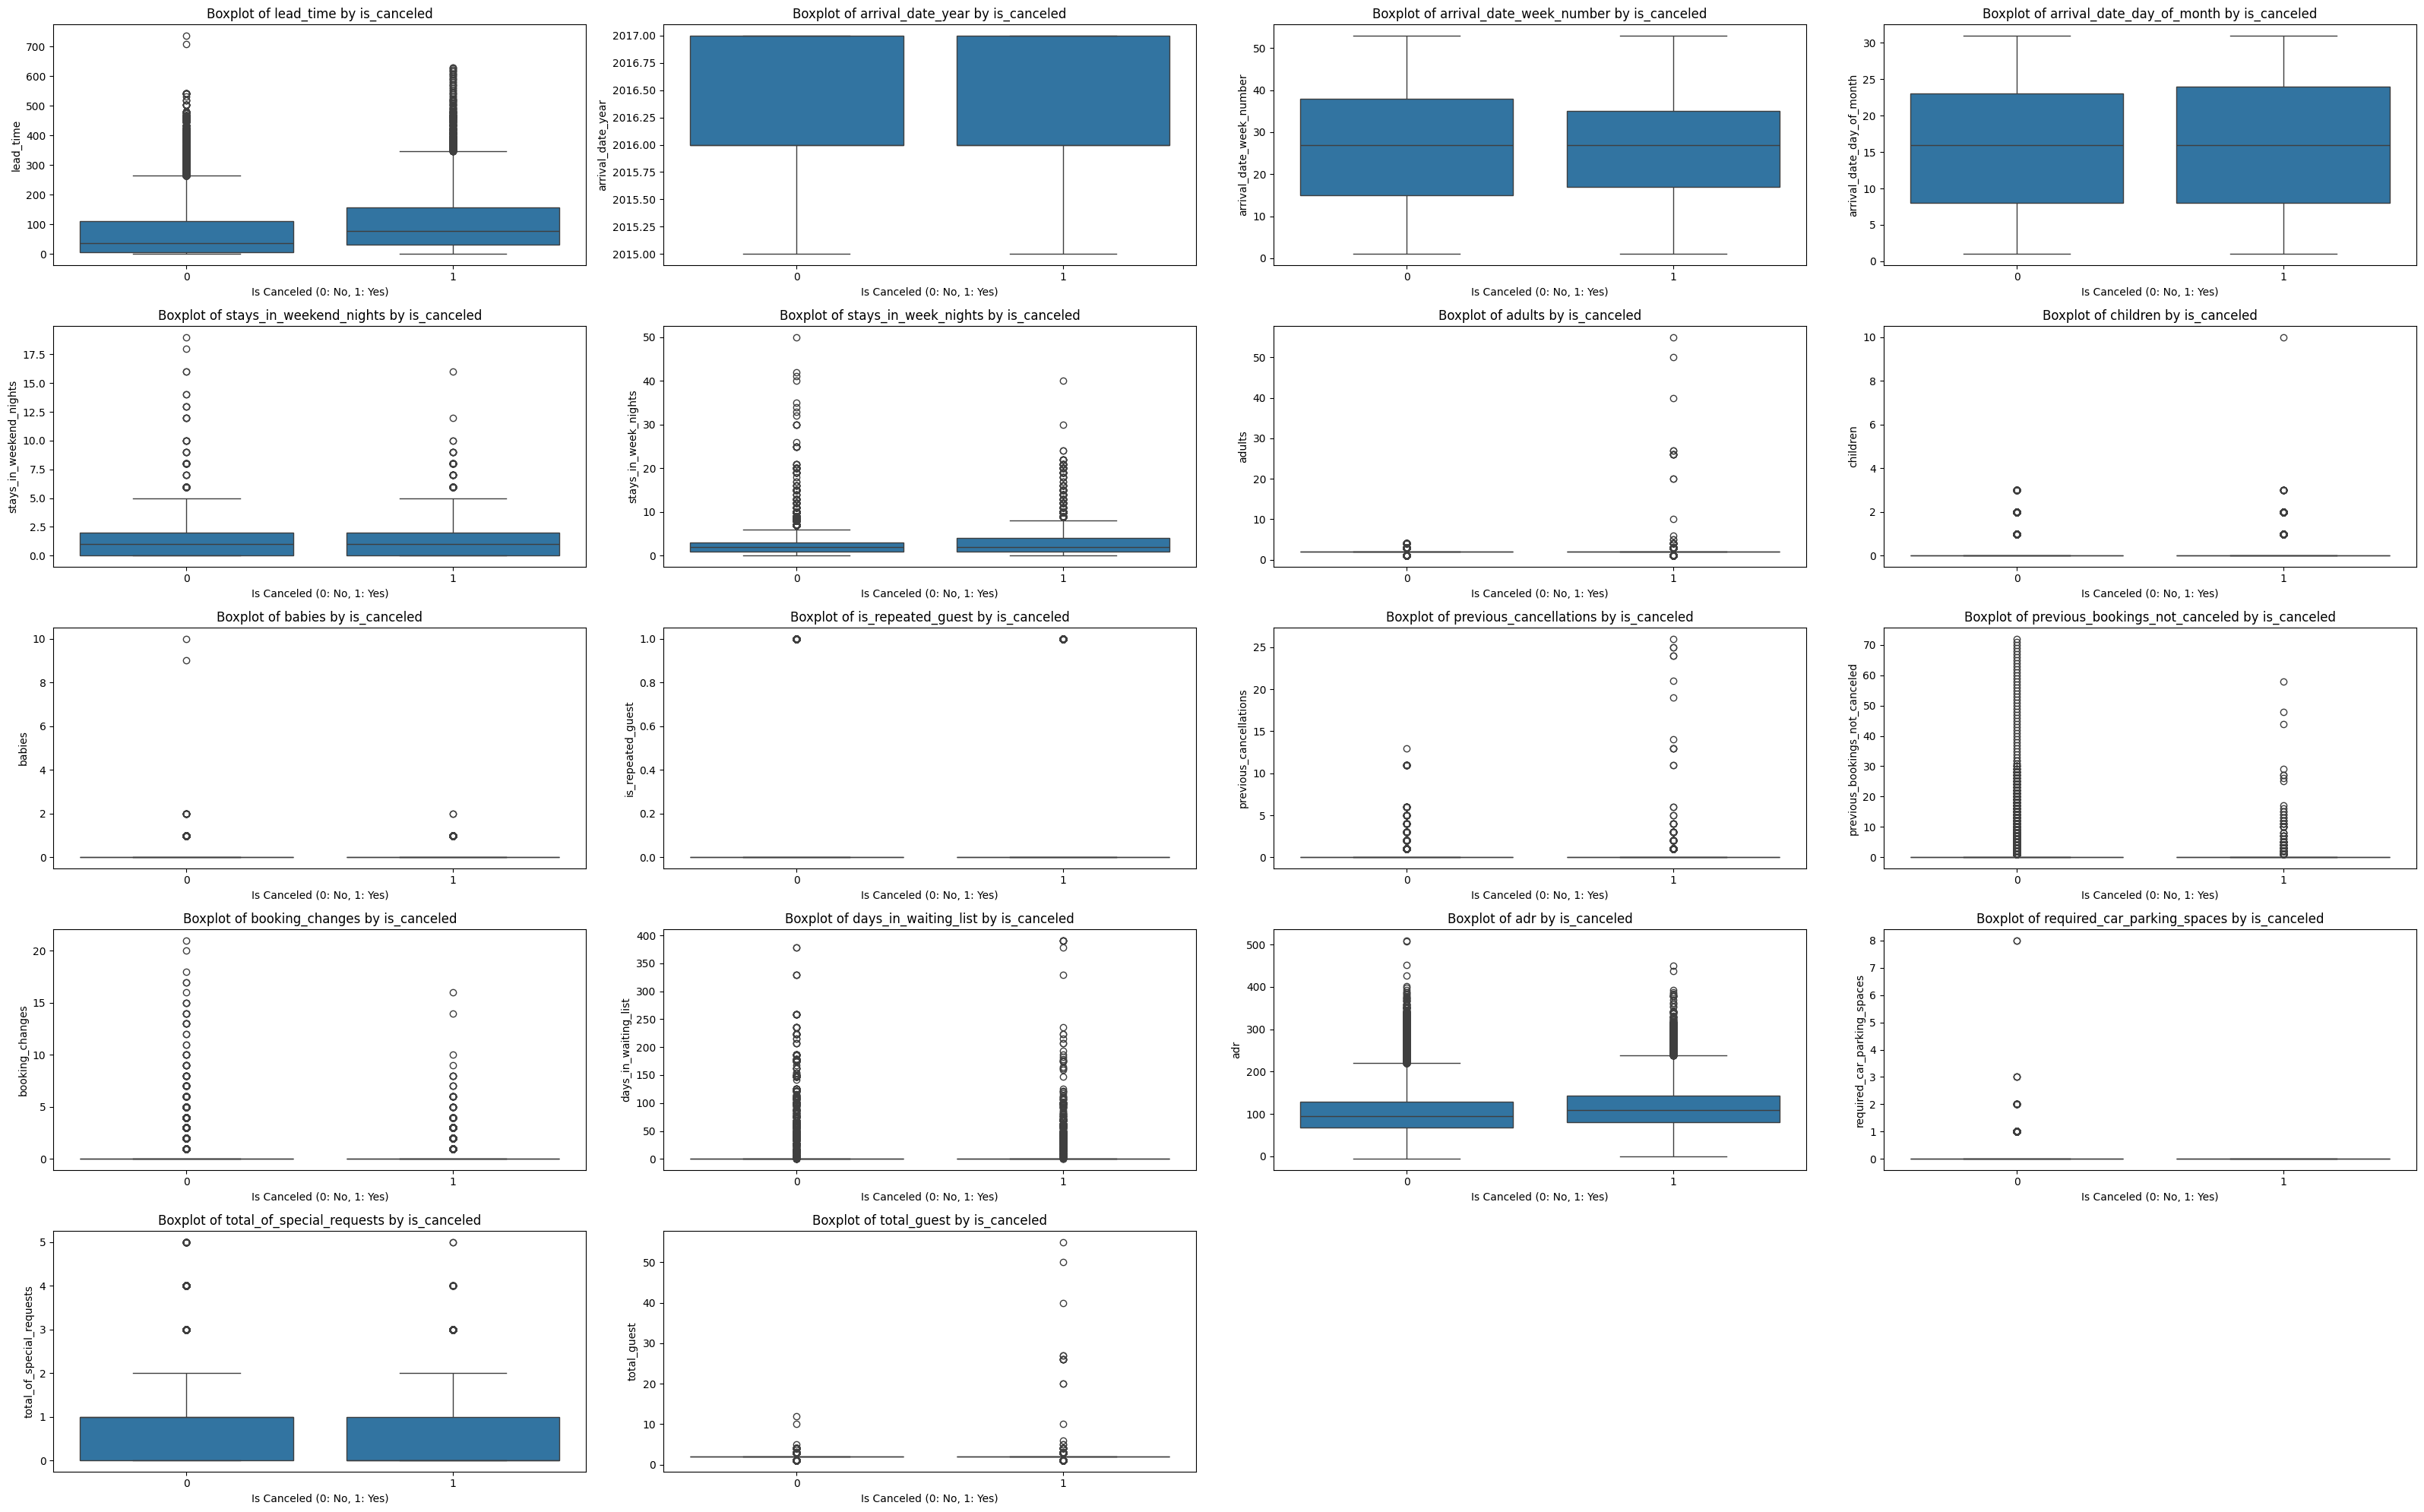

In [32]:
#check after drop dup
#with no outlier

numeric_cols = df_no_outlier.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['is_canceled']  # add/remove as needed
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

#Set up the subplot grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Corrected calculation for n_rows

plt.figure(figsize=(n_cols * 8, n_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_no_outlier, x='is_canceled', y=col)
    plt.title(f'Boxplot of {col} by is_canceled')
    plt.xlabel('Is Canceled (0: No, 1: Yes)')
    plt.tight_layout()

plt.show()
#those that boxplot show identical --> visual hint that these features may not be strong predictors

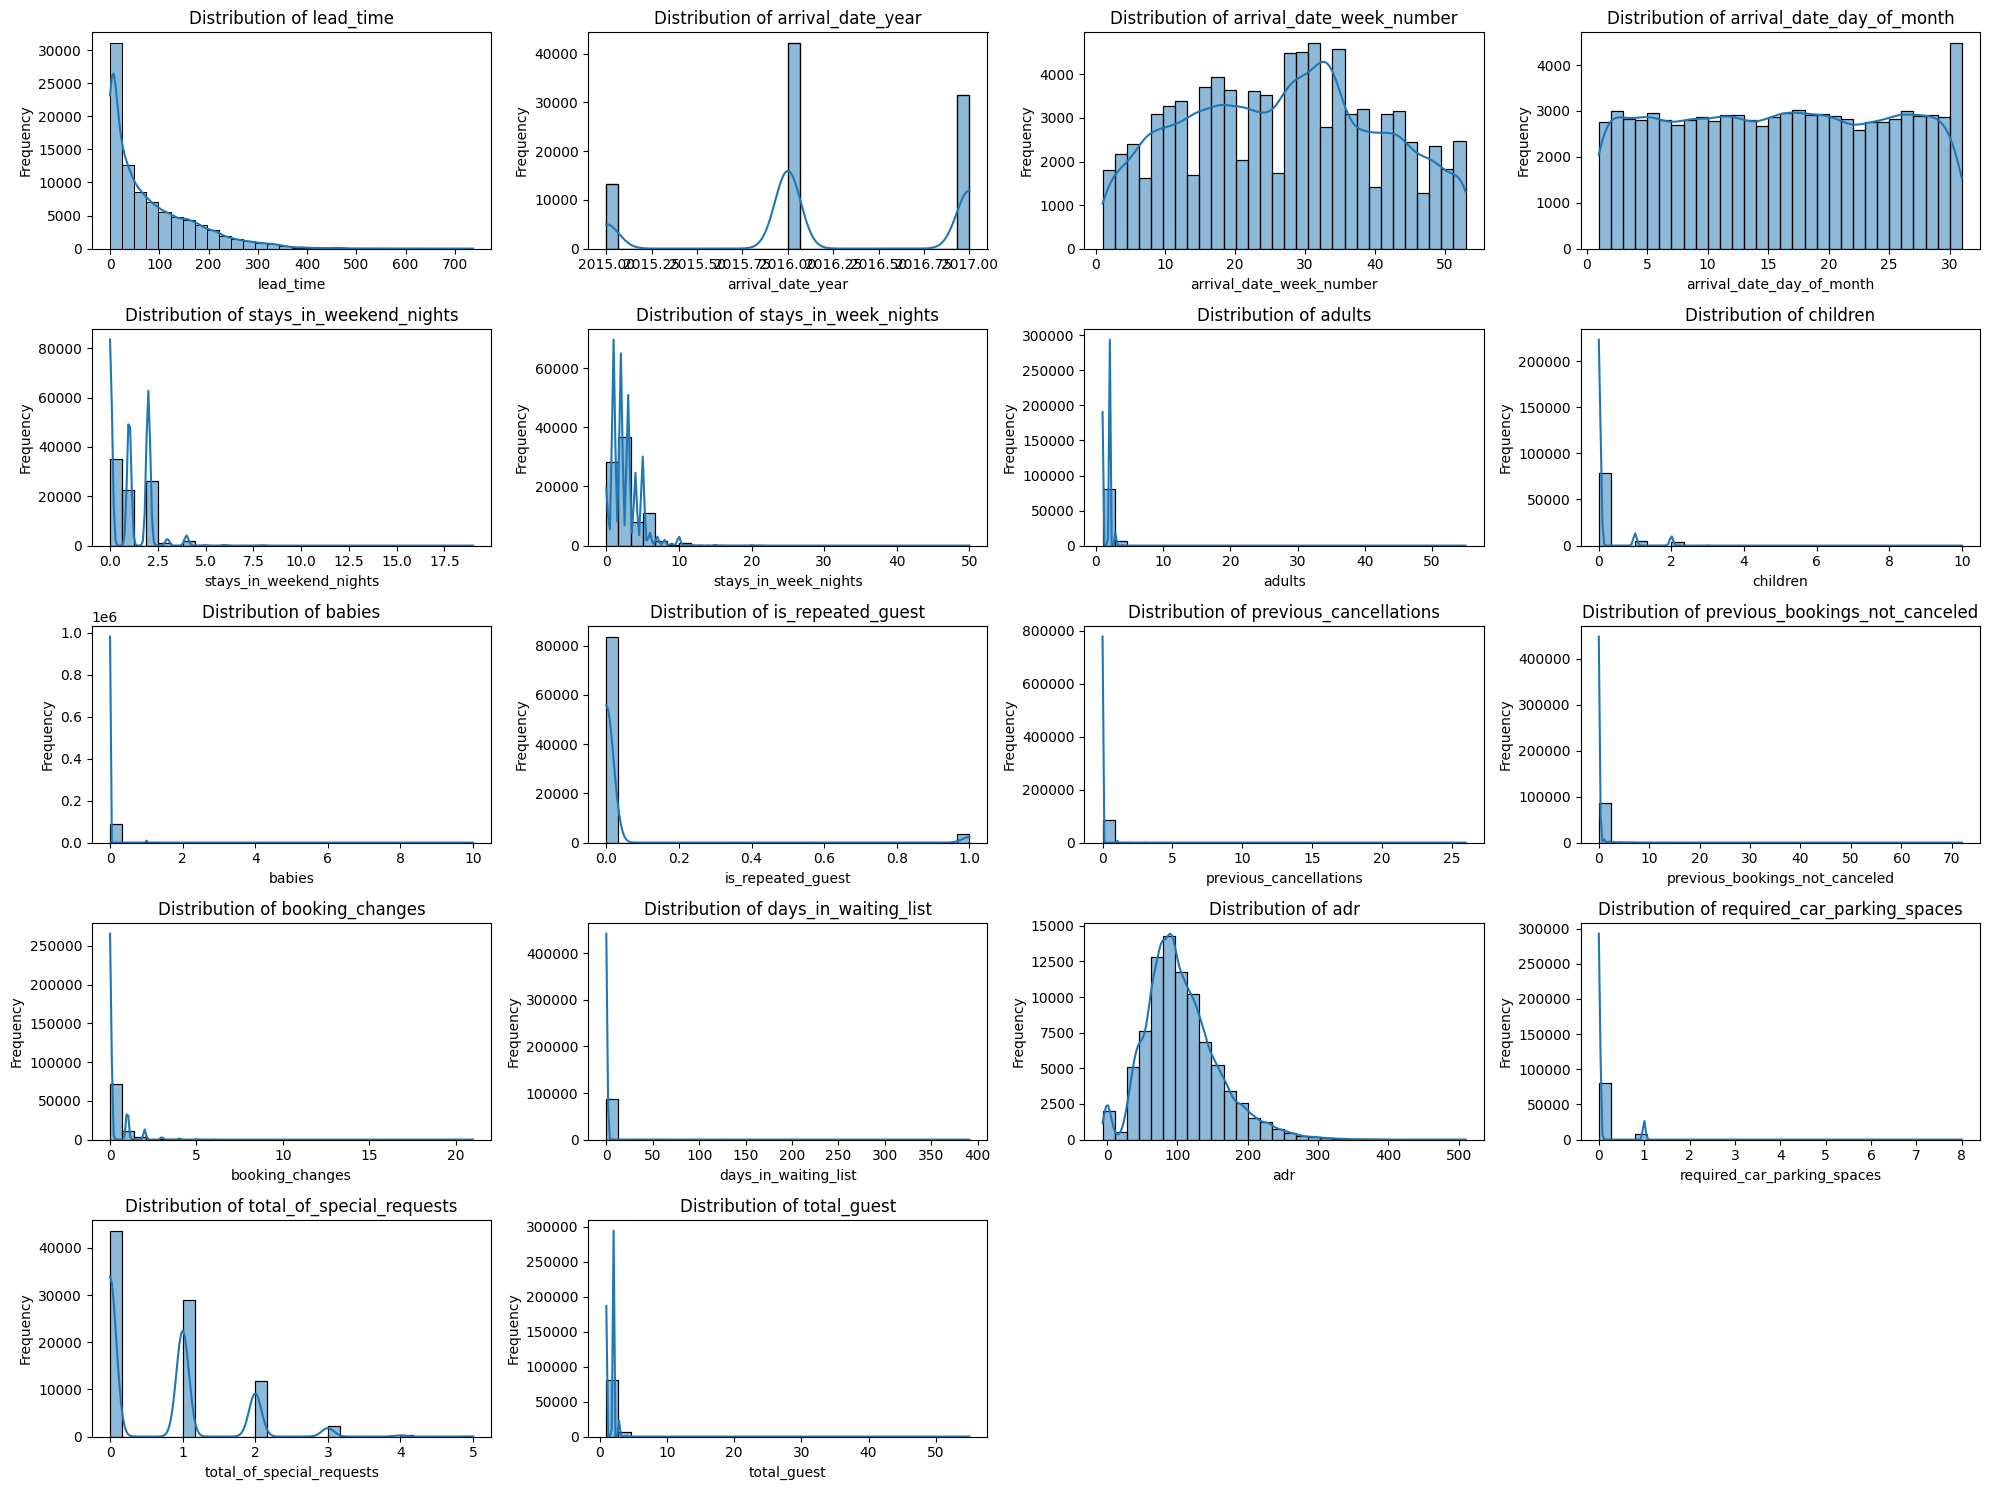

In [33]:
#show distribution graph for each numeric feature
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_no_outlier[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [34]:
#Check all outlier
df_no_outlier[df_no_outlier['previous_cancellations'] > 15]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guest
14779,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,A,A,0,Non Refund,0,Transient,50.00,0,0,2
14829,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,A,A,0,Non Refund,0,Transient,49.95,0,0,2
14838,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,A,A,0,Non Refund,0,Transient,38.00,0,0,2
14972,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,A,A,0,Non Refund,0,Transient,121.50,0,0,2
14997,Resort Hotel,1,244,2015,September,36,3,0,3,2,...,A,A,0,Non Refund,0,Transient,36.00,0,0,2
15150,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,A,A,0,No Deposit,0,Transient-Party,8.00,0,0,2
73713,City Hotel,1,265,2015,July,28,9,0,2,2,...,A,A,0,No Deposit,0,Transient-Party,62.80,0,0,2


/tmp/ipython-input-2634948370.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['cancel_rate']*100, palette='viridis', ax=ax)
/tmp/ipython-input-2634948370.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
/tmp/ipython-input-2634948370.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['cancel_rate']*100, palette='viridis', ax=ax)
/tmp/ipython-input-2634948370.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


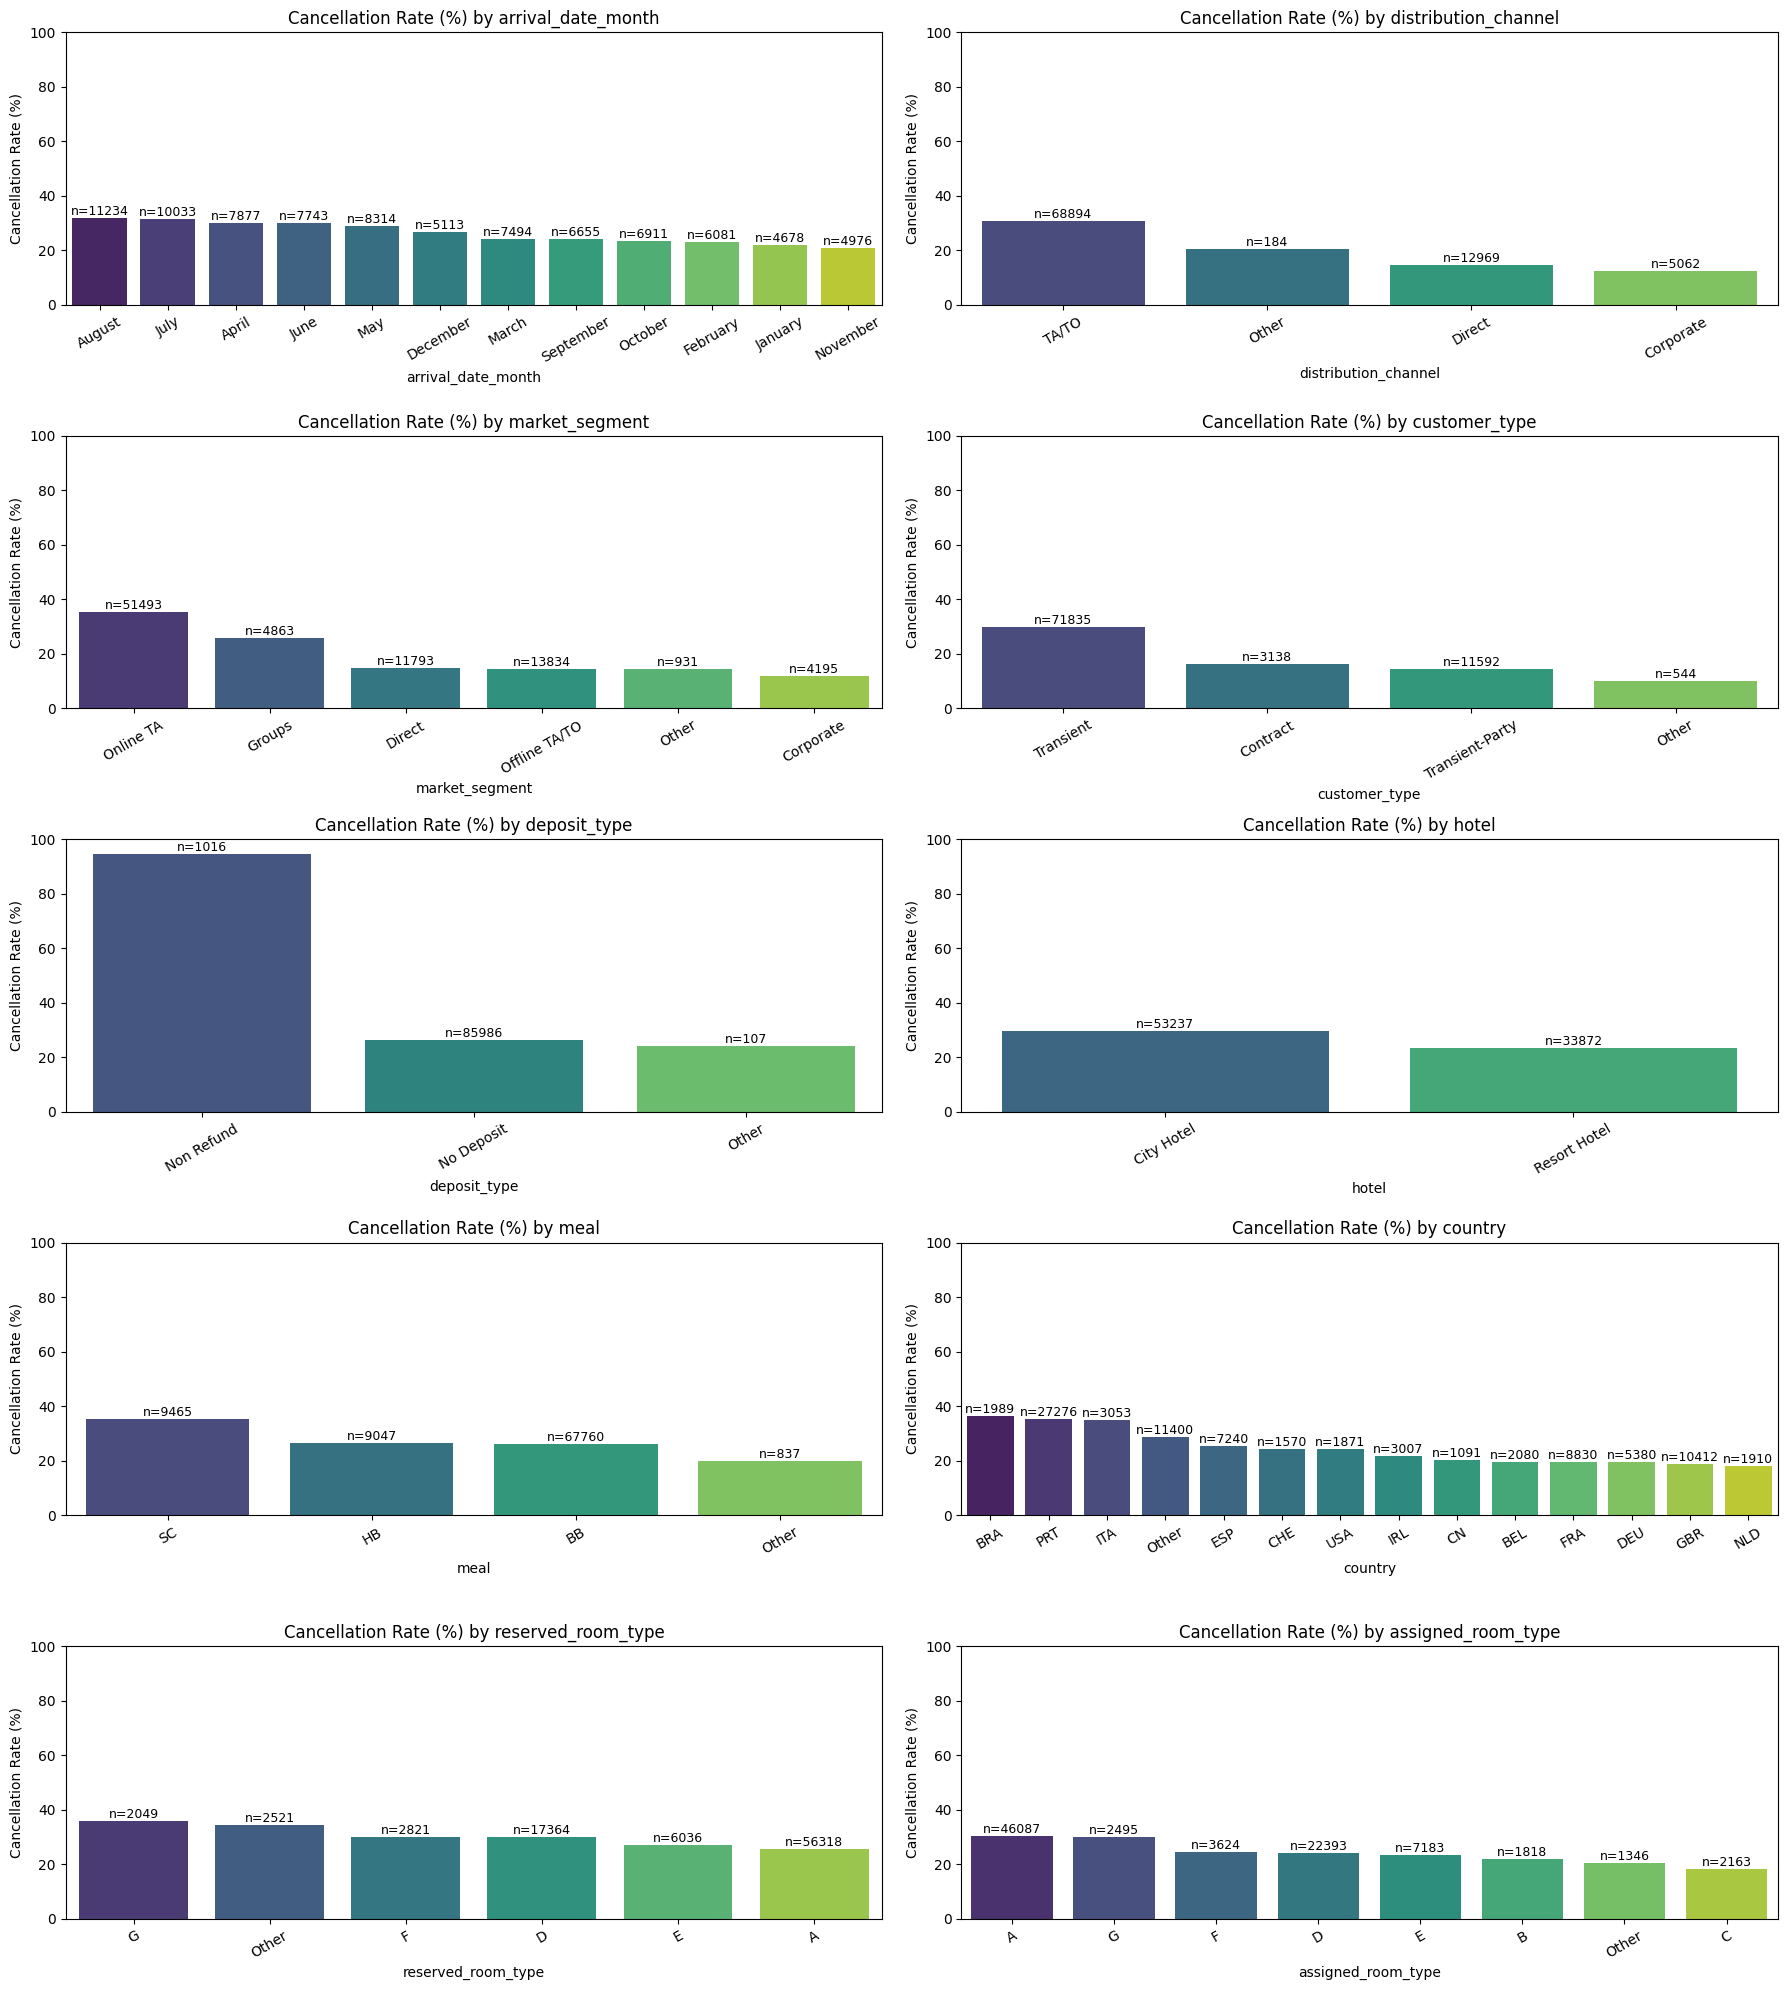

In [35]:
categorical_cols = [
    "arrival_date_month", "distribution_channel", "market_segment",
    "customer_type", "deposit_type", "hotel", "meal", "country",
    "reserved_room_type", "assigned_room_type"
]

def plot_cancellation_rate(df, col, ax, top_n=15, min_count=1000):
    # Group rare categories
    value_counts = df[col].value_counts()
    if len(value_counts) > top_n:
        top_categories = value_counts.nlargest(top_n).index
        df = df.copy()
        df[col] = df[col].where(df[col].isin(top_categories), other='Other')

    # Calculate cancellation rate and count per category
    summary = (
        df.groupby(col)['is_canceled']
        .agg(['mean', 'count'])
        .rename(columns={'mean': 'cancel_rate'})
        .sort_values('cancel_rate', ascending=False)
    )

    # Optionally group categories with very low count into 'Other'
    if min_count:
        rare = summary[summary['count'] < min_count].index
        df[col] = df[col].where(~df[col].isin(rare), other='Other')
        summary = (
            df.groupby(col)['is_canceled']
            .agg(['mean', 'count'])
            .rename(columns={'mean': 'cancel_rate'})
            .sort_values('cancel_rate', ascending=False)
        )

    # Plot on the provided axis
    sns.barplot(x=summary.index, y=summary['cancel_rate']*100, palette='viridis', ax=ax)
    ax.set_title(f'Cancellation Rate (%) by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Cancellation Rate (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.set_ylim(0, 100)
    # Annotate with counts
    for i, (rate, count) in enumerate(zip(summary['cancel_rate'], summary['count'])):
        ax.text(i, rate*100, f'n={count}', ha='center', va='bottom', fontsize=9)

# Set up the subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 9, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot for each categorical feature
for i, col in enumerate(categorical_cols):
    plot_cancellation_rate(df_no_outlier, col, axes[i], top_n=15, min_count=1000)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#export df_no_outlier in csv file
# df_no_outlier.to_csv('df_no_outlier.csv', index=False)

## Prepare data

In [36]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

In [37]:
# Separate a small portion of the data as truly unseen data
unseen_data = df_no_outlier.sample(n=1000, random_state=42)
df_for_training = df_no_outlier.drop(unseen_data.index)

display(unseen_data)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guest
12410,Resort Hotel,1,310,2017,June,26,27,2,5,3,...,Other,Other,0,No Deposit,0,Transient,160.43,0,0,3
77577,City Hotel,0,2,2015,October,43,18,2,0,1,...,A,A,0,No Deposit,0,Transient,65.00,0,0,1
26827,Resort Hotel,0,5,2016,August,33,11,0,1,2,...,A,D,0,No Deposit,0,Transient,189.00,0,0,2
86076,City Hotel,0,75,2016,March,13,24,0,3,2,...,D,D,0,No Deposit,0,Transient,114.30,0,1,2
54677,City Hotel,1,61,2016,July,30,23,1,1,2,...,A,A,0,No Deposit,0,Transient,105.30,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71609,City Hotel,1,63,2017,July,28,9,2,0,3,...,D,D,0,No Deposit,0,Transient,180.00,0,0,3
114698,City Hotel,0,184,2017,June,25,23,1,2,2,...,A,A,0,No Deposit,0,Transient,89.10,0,0,2
106015,City Hotel,0,154,2017,February,7,17,0,2,2,...,A,A,0,No Deposit,0,Transient,75.00,0,0,2
20821,Resort Hotel,0,7,2016,February,7,9,0,2,1,...,A,A,0,No Deposit,0,Transient-Party,37.00,0,0,1


In [38]:
df_for_training.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_guest'],
      dtype='object')

## No feature selection

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

# 1. Define target & features
target = "is_canceled"
features = [col for col in df_for_training.columns if col != target]

X = df_for_training[features]
y = df_for_training[[target]]

# 2. Split dataset
# split between cancel and non-cancel equally between test and train dataset (stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. Preprocessing
numeric_features = df_for_training[features].select_dtypes(include=np.number).columns.tolist()
categorical_features = df_for_training[features].select_dtypes(include='object').columns.tolist()

numeric_transformer = StandardScaler() #for outlier RobustScaler
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

/tmp/ipython-input-2235097011.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train.values.flatten(), palette='viridis', ax=ax_train)
/tmp/ipython-input-2235097011.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test.values.flatten(), palette='viridis', ax=ax_test)


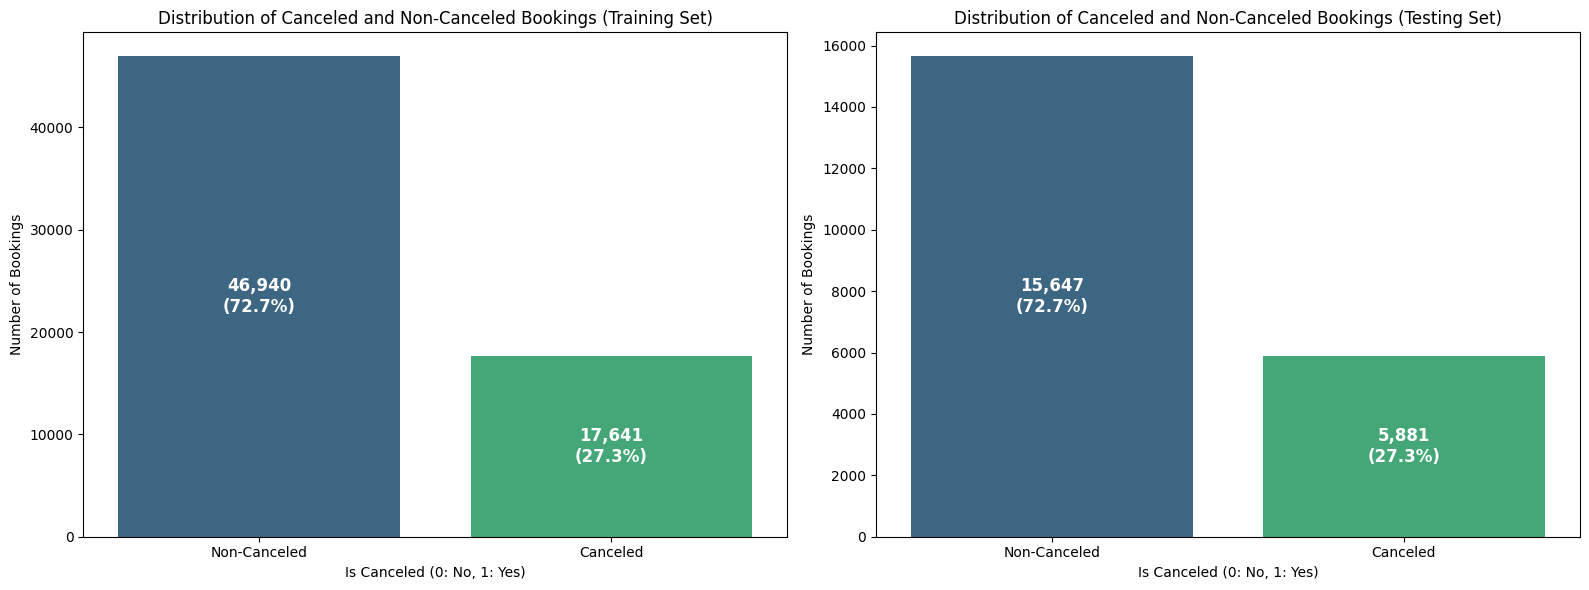

In [40]:
# Plot graph to see the distribution of train and test
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for y_train
ax_train = axes[0]
sns.countplot(x=y_train.values.flatten(), palette='viridis', ax=ax_train)
ax_train.set_title('Distribution of Canceled and Non-Canceled Bookings (Training Set)')
ax_train.set_xlabel('Is Canceled (0: No, 1: Yes)')
ax_train.set_ylabel('Number of Bookings')
ax_train.set_xticks([0, 1])
ax_train.set_xticklabels(['Non-Canceled', 'Canceled'])

total_train = len(y_train)
for p in ax_train.patches:
    count = int(p.get_height())
    percent = 100 * count / total_train
    ax_train.annotate(f'{count:,}\n({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Plot for y_test
ax_test = axes[1]
sns.countplot(x=y_test.values.flatten(), palette='viridis', ax=ax_test)
ax_test.set_title('Distribution of Canceled and Non-Canceled Bookings (Testing Set)')
ax_test.set_xlabel('Is Canceled (0: No, 1: Yes)')
ax_test.set_ylabel('Number of Bookings')
ax_test.set_xticks([0, 1])
ax_test.set_xticklabels(['Non-Canceled', 'Canceled'])

total_test = len(y_test)
for p in ax_test.patches:
    count = int(p.get_height())
    percent = 100 * count / total_test
    ax_test.annotate(f'{count:,}\n({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [41]:
X_train.shape, X_test.shape

((64581, 28), (21528, 28))

## For feature selection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

# For Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Define a helper function to get classification report as a DataFrame
def get_classification_report_df(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report = df_report.drop(columns=['support'])
    try:
        auc_roc_val = roc_auc_score(y_true, y_pred) # Assuming y_pred are class labels for simplicity here
    except ValueError:
        auc_roc_val = np.nan # If roc_auc_score fails, set to NaN
    df_report.loc['auc_roc'] = auc_roc_val
    df_report.rename(columns={'precision': f'{model_name}_precision', 'recall': f'{model_name}_recall', 'f1-score': f'{model_name}_f1-score'}, inplace=True)
    return df_report

# Define the target variable
target = "is_canceled"
features = [col for col in df_for_training.columns if col != target]

# Dynamically determine numeric and categorical features
numeric_features = df_for_training[features].select_dtypes(include=np.number).columns.tolist()
categorical_features = df_for_training[features].select_dtypes(include='object').columns.tolist()


# Split train test
X = df_for_training[features]
y = df_for_training[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y #split data equally between non-cancel Vs canceled
)

# Instantiate transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Create a ColumnTransformer named preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any, though our 'features' list is exhaustive
)

print("Preprocessing pipeline (ColumnTransformer) defined successfully.\n")

# --- Feature Selection using RandomForestClassifier ---
print("--- Performing Feature Selection ---")

# Create a pipeline for feature selection
fs_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Fit the pipeline to the training data
fs_pipeline.fit(X_train, y_train)

# Use SelectFromModel to choose features based on feature importances
selector = SelectFromModel(fs_pipeline.named_steps['clf'], threshold='median', prefit=True) # or a numerical threshold

# Transform X_train to get feature names after one-hot encoding
X_train_processed_temp = fs_pipeline.named_steps['preprocessor'].fit_transform(X_train)

preprocessed_feature_names = numeric_features
# For categorical features
if fs_pipeline.named_steps['preprocessor'].transformers_[-1][1].get_feature_names_out is not None:
    preprocessed_feature_names.extend(fs_pipeline.named_steps['preprocessor'].transformers_[-1][1].get_feature_names_out(categorical_features))
else:
    print("Warning: get_feature_names_out not available. Feature names might be generic for OHE.")
    dummy_encoder = OneHotEncoder(handle_unknown="ignore").fit(X_train[categorical_features])
    preprocessed_feature_names.extend([f'cat_{col}_{val}' for col in categorical_features for val in dummy_encoder.categories_[categorical_features.index(col)]])

# Select features from the processed data
X_train_selected = selector.transform(X_train_processed_temp)

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features_names = [preprocessed_feature_names[i] for i in selected_feature_indices]

print(f"Selected {len(selected_features_names)} features out of {len(preprocessed_feature_names)}:")
print(selected_features_names)

# Create a new preprocessor that only includes the selected features (original feature names)
selected_numeric_features = [f for f in numeric_features if f in ' '.join(selected_features_names)] # Simplified check
selected_categorical_features = [f for f in categorical_features if f in ' '.join(selected_features_names)] # Simplified check

# Refine the list of selected original features more accurately
final_selected_original_features = []
for original_feature in features:
    if original_feature in numeric_features:
        # Check if the numeric feature itself was selected or if its importance led to selection
        if any(f.startswith(original_feature) for f in selected_features_names): # Check if it's in the selected list (exact match or start of OHE)
            final_selected_original_features.append(original_feature)
    elif original_feature in categorical_features:
        # For categorical, if any of its one-hot encoded columns are selected, keep the original categorical feature
        if any(f.startswith(f'cat_{original_feature}_') for f in selected_features_names):
             final_selected_original_features.append(original_feature)

print("Original features corresponding to selected preprocessed features:")
print(final_selected_original_features)

# Update the global features variable and re-split X, y
features = final_selected_original_features
numeric_features = [f for f in features if f in df_for_training.select_dtypes(include=np.number).columns]
categorical_features = [f for f in features if f in df_for_training.select_dtypes(include='object').columns]

X = df_for_training[features]
y = df_for_training[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Re-define the preprocessor with only the selected original features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder='drop' # Drop columns not in the selected features
)

print("Updated Preprocessing pipeline (ColumnTransformer) defined with selected features.\n")

Preprocessing pipeline (ColumnTransformer) defined successfully.

--- Performing Feature Selection ---


KeyboardInterrupt: 

In [ ]:
#plot graph to show feature importance
feature_importances = pd.Series(fs_pipeline.named_steps['clf'].feature_importances_, index=preprocessed_feature_names)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
print(X_train.columns)
print(X_train.shape)

#Run All Model Training, Optimization, and Evaluation

## KNN

--- Training and Optimizing KNN Model ---

=== Param set 1/5: {'classifier__n_neighbors': 3}
Finished in 378.8 seconds

=== Param set 2/5: {'classifier__n_neighbors': 5}
Finished in 385.5 seconds

=== Param set 3/5: {'classifier__n_neighbors': 10}
Finished in 376.7 seconds

=== Param set 4/5: {'classifier__n_neighbors': 15}
Finished in 388.5 seconds

=== Param set 5/5: {'classifier__n_neighbors': 20}
Finished in 387.6 seconds
Best parameters for KNN found: {'classifier__n_neighbors': 3}
Best Recall score for KNN: 0.5764419879598199

Best KNN Model Performance (using best_params={'classifier__n_neighbors': 3}):
Train Recall: 0.7695
Test Recall: 0.5725
Train Accuracy: 0.8865
Test Accuracy: 0.7771


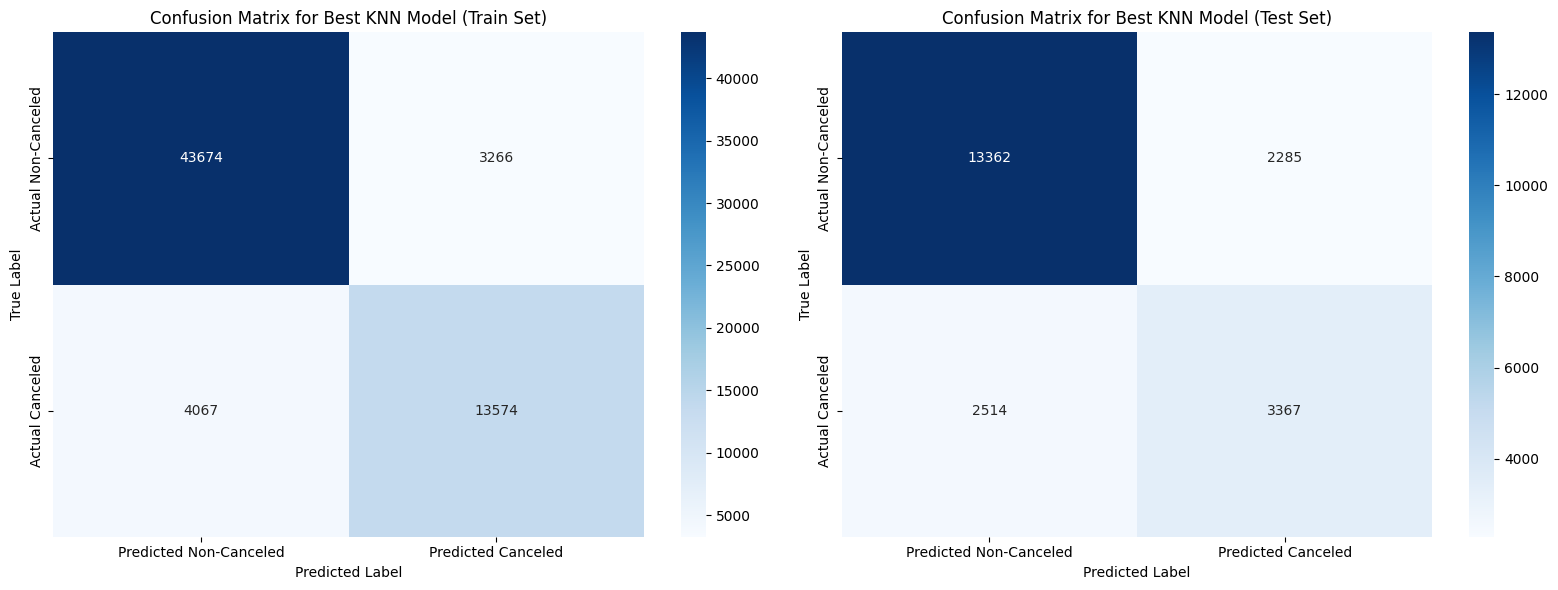


--- Generating Train-Test Curve for KNN (varying n_neighbors) ---


Calculating KNN scores for curve:   0%|          | 0/7 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [42]:
from time import time
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, ParameterGrid

# --- KNN Model ---
print("--- Training and Optimizing KNN Model ---")
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

# Prepare Param for GridSearchCV
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 10, 15, 20]
}

param_grid = list(ParameterGrid(param_grid_knn))

best_score = -1
best_params = None

# GridSearch CV
for i, params in enumerate(param_grid, start=1):
    print(f"\n=== Param set {i}/{len(param_grid)}: {params}")
    t0 = time()
    model = knn_pipeline.set_params(**params)

    scores = cross_val_score(
        model,
        X_train,
        y_train.values.ravel(),
        cv=5,
        scoring="recall",
        n_jobs=1
    )
    print(f"Finished in {time() - t0:.1f} seconds")
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print("Best parameters for KNN found:", best_params)
print("Best Recall score for KNN:", best_score)

# --- Evaluating Best KNN Model Performance ---
best_knn_model_final = knn_pipeline.set_params(**best_params)
best_knn_model_final.fit(X_train, y_train.values.ravel())

y_train_pred_best = best_knn_model_final.predict(X_train)
y_test_pred_best = best_knn_model_final.predict(X_test)

train_recall = recall_score(y_train, y_train_pred_best)
test_recall = recall_score(y_test, y_test_pred_best)
train_accuracy = accuracy_score(y_train, y_train_pred_best)
test_accuracy = accuracy_score(y_test, y_test_pred_best)

print(f"\nBest KNN Model Performance (using best_params={best_params}):")
print(f"Train Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix_train = confusion_matrix(y_train, y_train_pred_best)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Non-Canceled', 'Actual Canceled'], ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix for Best KNN Model (Train Set)')

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Non-Canceled', 'Actual Canceled'], ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix for Best KNN Model (Test Set)')

plt.tight_layout()
plt.show()

# --- Train-Test Curve for KNN ---
print("\n--- Generating Train-Test Curve for KNN (varying n_neighbors) ---")
n_neighbors_range = [3, 5, 10, 15, 20, 25, 30]

train_accuracy_knn = []
test_accuracy_knn = []
train_recall_knn = []
test_recall_knn = []

for n in tqdm(n_neighbors_range, desc="Calculating KNN scores for curve"):
    knn_temp_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=n))
    ])
    knn_temp_pipeline.fit(X_train, y_train.values.ravel())

    y_train_pred = knn_temp_pipeline.predict(X_train)
    y_test_pred = knn_temp_pipeline.predict(X_test)

    train_accuracy_knn.append(accuracy_score(y_train, y_train_pred))
    test_accuracy_knn.append(accuracy_score(y_test, y_test_pred))
    train_recall_knn.append(recall_score(y_train, y_train_pred))
    test_recall_knn.append(recall_score(y_test, y_test_pred))

# Plotting the train-test accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, train_accuracy_knn, label='Training Accuracy', marker='o')
plt.plot(n_neighbors_range, test_accuracy_knn, label='Testing Accuracy', marker='o')
plt.title('KNN: Training vs. Testing Accuracy (Train-Test Curve for n_neighbors)')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the train-test recall curve
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, train_recall_knn, label='Training Recall', marker='o')
plt.plot(n_neighbors_range, test_recall_knn, label='Testing Recall', marker='o')
plt.title('KNN: Training vs. Testing Recall (Train-Test Curve for n_neighbors)')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Recall')
plt.grid(True)
plt.legend()
plt.show()


Classification Report for Best KNN Model:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     15647
           1       0.60      0.57      0.58      5881

    accuracy                           0.78     21528
   macro avg       0.72      0.71      0.72     21528
weighted avg       0.77      0.78      0.78     21528

AUC-ROC on Test Set for Best KNN Model: 0.7132436481992444


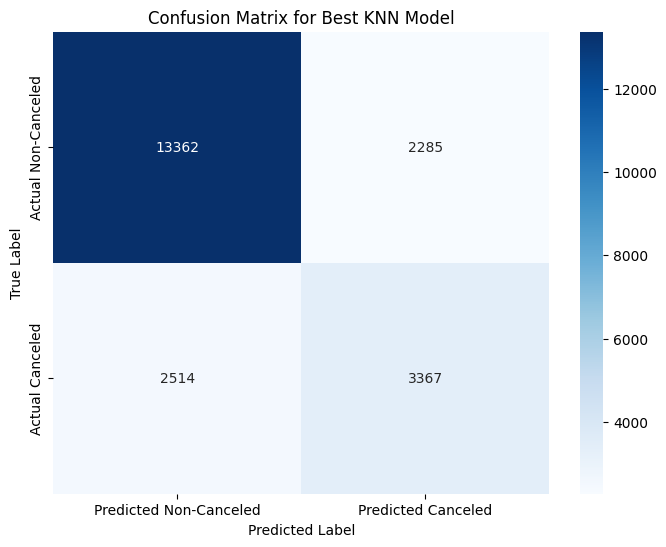

In [43]:
# Report
print("\nClassification Report for Best KNN Model:")
print(classification_report(y_test, y_test_pred_best))
print("AUC-ROC on Test Set for Best KNN Model:", roc_auc_score(y_test, y_test_pred_best))

conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Non-Canceled', 'Actual Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best KNN Model')
plt.show()

In [44]:
# Process the unseen data using the same preprocessor as the model
unseen_data_processed = preprocessor.transform(unseen_data[features])

# Make predictions (class labels) using the best XGBoost model
unseen_data_predictions_knn = best_knn_model_final.predict(unseen_data[features]) # Use the original features of unseen_data for pipeline

# Get prediction probabilities for AUC-ROC if needed, although for this display, class labels are enough
unseen_data_probabilities_knn = best_knn_model_final.predict_proba(unseen_data[features])[:, 1]

# Display unseen data with predictions and actual values
unseen_data_with_predictions_knn = unseen_data.copy()
unseen_data_with_predictions_knn['predicted_is_canceled'] = unseen_data_predictions_knn
unseen_data_with_predictions_knn['predicted_probability_canceled'] = unseen_data_probabilities_knn

print("Unseen Data with Predictions:")
display(unseen_data_with_predictions_knn[['is_canceled', 'predicted_is_canceled', 'predicted_probability_canceled'] + features])

# Optionally, you can calculate performance metrics for the unseen data if you have ground truth
print("\nPerformance on Unseen Data:")
print(classification_report(unseen_data['is_canceled'], unseen_data_predictions_knn))
print("AUC-ROC on Unseen Data:", roc_auc_score(unseen_data['is_canceled'], unseen_data_probabilities_knn))

Unseen Data with Predictions:


,is_canceled,predicted_is_canceled,predicted_probability_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guest
12410,1,1,1.000000,Resort Hotel,310,2017,June,26,27,2,...,Other,Other,0,No Deposit,0,Transient,160.43,0,0,3
77577,0,0,0.000000,City Hotel,2,2015,October,43,18,2,...,A,A,0,No Deposit,0,Transient,65.00,0,0,1
26827,0,0,0.000000,Resort Hotel,5,2016,August,33,11,0,...,A,D,0,No Deposit,0,Transient,189.00,0,0,2
86076,0,1,0.666667,City Hotel,75,2016,March,13,24,0,...,D,D,0,No Deposit,0,Transient,114.30,0,1,2
54677,1,1,0.666667,City Hotel,61,2016,July,30,23,1,...,A,A,0,No Deposit,0,Transient,105.30,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71609,1,1,0.666667,City Hotel,63,2017,July,28,9,2,...,D,D,0,No Deposit,0,Transient,180.00,0,0,3
114698,0,0,0.000000,City Hotel,184,2017,June,25,23,1,...,A,A,0,No Deposit,0,Transient,89.10,0,0,2
106015,0,0,0.000000,City Hotel,154,2017,February,7,17,0,...,A,A,0,No Deposit,0,Transient,75.00,0,0,2
20821,0,0,0.000000,Resort Hotel,7,2016,February,7,9,0,...,A,A,0,No Deposit,0,Transient-Party,37.00,0,0,1



Performance on Unseen Data:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       762
           1       0.52      0.57      0.54       238

    accuracy                           0.77      1000
   macro avg       0.69      0.70      0.70      1000
weighted avg       0.78      0.77      0.78      1000

AUC-ROC on Unseen Data: 0.7801864840424358


## XGBoost


--- Training and Optimizing XGBoost Model ---


XGBoost grid search:   0%|          | 0/147 [00:00<?, ?it/s]

Best params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 13, 'classifier__n_estimators': 600}
Best Recall: 0.665438922333834

--- Generating Train-Test Curve for XGBoost (varying n_estimators) ---


Calculating XGBoost scores for curve:   0%|          | 0/16 [00:00<?, ?it/s]

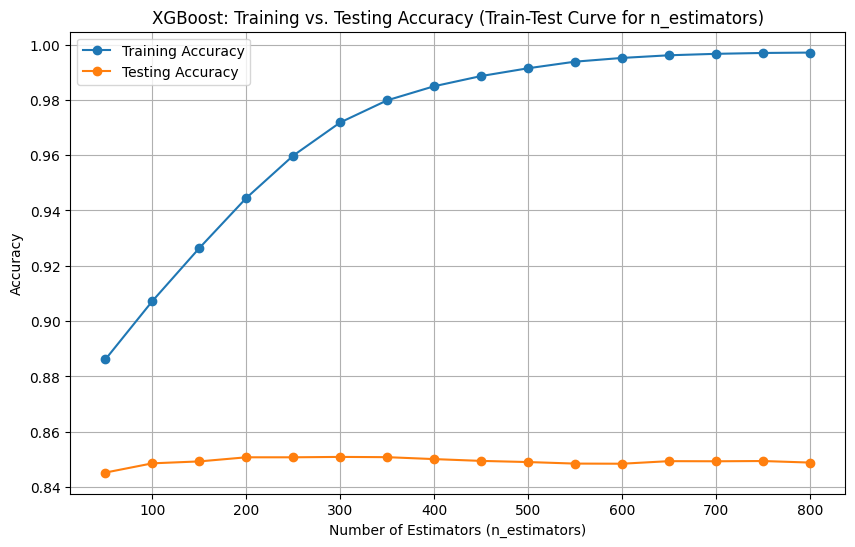


--- Interpreting the Train-Test Curve ---
Observe the gap between the Training Accuracy and Testing Accuracy curves:
- If Training Accuracy is high but Testing Accuracy is significantly lower, the model is likely overfitting.
- If both Training and Testing Accuracy are low and close together, the model is likely underfitting.
- The sweet spot is where both accuracies are high and the gap between them is minimal.


In [45]:
# --- XGBoost Model ---
print("\n--- Training and Optimizing XGBoost Model ---")

# Pipeline
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        random_state=42,
        eval_metric="logloss",   # Use logloss for binary classification
        tree_method="hist",      # much faster on CPU
        n_jobs=1                 # avoid CPU oversubscription with CV
    ))
])

# Hyperparameter grid
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [1, 3, 5, 7, 9, 11, 13]
}

param_grid = list(ParameterGrid(param_grid_xgb))

best_score = -1
best_params = None

# Manual CV with progress bar
for params in tqdm(param_grid, desc="XGBoost grid search"):
    model = xgb_pipeline.set_params(**params)

    scores = cross_val_score(
        model,
        X_train, y_train,
        cv=5,
        scoring="recall",
        n_jobs=-1
    )
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print("Best params:", best_params)
print("Best Recall:", best_score)

# --- Generate Train-Test Curve for XGBoost ---
print("\n--- Generating Train-Test Curve for XGBoost (varying n_estimators) ---")
# Use best_params from GridSearchCV for fixed hyperparameters
# Fallback to default if best_params is None (e.g., if GridSearchCV was skipped/interrupted)
best_learning_rate = best_params.get('classifier__learning_rate', 0.1) if best_params else 0.1
best_max_depth = best_params.get('classifier__max_depth', 7) if best_params else 7

n_estimators_range = range(50, 801, 50) # Test a range around the typical optimal n_estimators

train_scores_xgb = []
test_scores_xgb = []

for n_est in tqdm(n_estimators_range, desc="Calculating XGBoost scores for curve"):
    xgb_temp_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(
            n_estimators=n_est,
            learning_rate=best_learning_rate, # Use best learning rate
            max_depth=best_max_depth, # Use best max_depth
            random_state=42,
            eval_metric="logloss", # binary classification
            tree_method="hist",
            n_jobs=-1
        ))
    ])

    xgb_temp_pipeline.fit(X_train, y_train)

    y_train_pred_xgb = xgb_temp_pipeline.predict(X_train)
    train_scores_xgb.append(accuracy_score(y_train, y_train_pred_xgb))

    y_test_pred_xgb = xgb_temp_pipeline.predict(X_test)
    test_scores_xgb.append(accuracy_score(y_test, y_test_pred_xgb))

# Plotting the train-test curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores_xgb, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores_xgb, label='Testing Accuracy', marker='o')
plt.title('XGBoost: Training vs. Testing Accuracy (Train-Test Curve for n_estimators)')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

print("\n--- Interpreting the Train-Test Curve ---")
print("Observe the gap between the Training Accuracy and Testing Accuracy curves:")
print("- If Training Accuracy is high but Testing Accuracy is significantly lower, the model is likely overfitting.")
print("- If both Training and Testing Accuracy are low and close together, the model is likely underfitting.")
print("- The sweet spot is where both accuracies are high and the gap between them is minimal.")


Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15647
           1       0.75      0.67      0.71      5881

    accuracy                           0.85     21528
   macro avg       0.82      0.79      0.80     21528
weighted avg       0.84      0.85      0.85     21528

AUC-ROC on Test Set for Best XGBoost Model: 0.9128836623539921


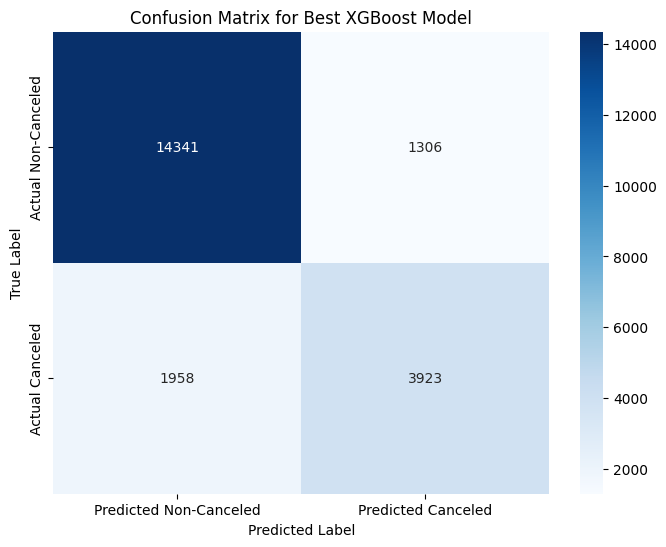

In [46]:
best_xgb_model_final = xgb_pipeline.set_params(**best_params)
best_xgb_model_final.fit(X_train, y_train)

# Predict on test data
y_test_pred_xgb = best_xgb_model_final.predict(X_test)
y_test_prob_xgb = best_xgb_model_final.predict_proba(X_test)[:, 1]

# Report
print("\nClassification Report for Best XGBoost Model:")
print(classification_report(y_test, y_test_pred_xgb))
print("AUC-ROC on Test Set for Best XGBoost Model:", roc_auc_score(y_test, y_test_prob_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Non-Canceled', 'Actual Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best XGBoost Model')
plt.show()

In [47]:
# Process the unseen data using the same preprocessor as the model
unseen_data_processed = preprocessor.transform(unseen_data[features])

# Make predictions (class labels) using the best XGBoost model
unseen_data_predictions = xgb_temp_pipeline.predict(unseen_data[features]) # Use the original features of unseen_data for pipeline

# Get prediction probabilities for AUC-ROC if needed, although for this display, class labels are enough
unseen_data_probabilities = xgb_temp_pipeline.predict_proba(unseen_data[features])[:, 1]

# Display unseen data with predictions and actual values
unseen_data_with_predictions = unseen_data.copy()
unseen_data_with_predictions['predicted_is_canceled'] = unseen_data_predictions
unseen_data_with_predictions['predicted_probability_canceled'] = unseen_data_probabilities

print("Unseen Data with Predictions:")
display(unseen_data_with_predictions[['is_canceled', 'predicted_is_canceled', 'predicted_probability_canceled'] + features])

# Optionally, you can calculate performance metrics for the unseen data if you have ground truth
print("\nPerformance on Unseen Data:")
print(classification_report(unseen_data['is_canceled'], unseen_data_predictions))
print("AUC-ROC on Unseen Data:", roc_auc_score(unseen_data['is_canceled'], unseen_data_probabilities))


Unseen Data with Predictions:


,is_canceled,predicted_is_canceled,predicted_probability_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guest
12410,1,1,0.991608,Resort Hotel,310,2017,June,26,27,2,...,Other,Other,0,No Deposit,0,Transient,160.43,0,0,3
77577,0,0,0.015486,City Hotel,2,2015,October,43,18,2,...,A,A,0,No Deposit,0,Transient,65.00,0,0,1
26827,0,0,0.001113,Resort Hotel,5,2016,August,33,11,0,...,A,D,0,No Deposit,0,Transient,189.00,0,0,2
86076,0,1,0.565267,City Hotel,75,2016,March,13,24,0,...,D,D,0,No Deposit,0,Transient,114.30,0,1,2
54677,1,1,0.964418,City Hotel,61,2016,July,30,23,1,...,A,A,0,No Deposit,0,Transient,105.30,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71609,1,1,0.595077,City Hotel,63,2017,July,28,9,2,...,D,D,0,No Deposit,0,Transient,180.00,0,0,3
114698,0,0,0.000025,City Hotel,184,2017,June,25,23,1,...,A,A,0,No Deposit,0,Transient,89.10,0,0,2
106015,0,0,0.000096,City Hotel,154,2017,February,7,17,0,...,A,A,0,No Deposit,0,Transient,75.00,0,0,2
20821,0,0,0.000968,Resort Hotel,7,2016,February,7,9,0,...,A,A,0,No Deposit,0,Transient-Party,37.00,0,0,1



Performance on Unseen Data:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       762
           1       0.69      0.69      0.69       238

    accuracy                           0.85      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.85      0.85      0.85      1000

AUC-ROC on Unseen Data: 0.9010234014865789


## Logistic


--- Training and Optimizing Logistic Regression Model ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

Best parameters for Logistic Regression found: {'classifier__C': 100, 'classifier__penalty': 'l2'}
Best Recall score for Logistic Regression: 0.4848369583027317

--- Generating Train-Test Curve for Logistic Regression (varying C) ---


Calculating Logistic Regression scores for curve:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

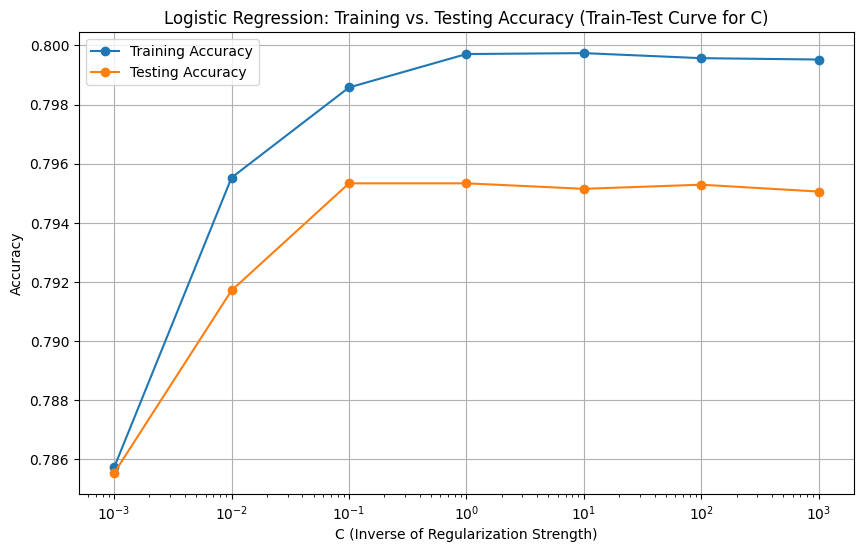


--- Interpreting the Train-Test Curve ---
Observe the gap between the Training Accuracy and Testing Accuracy curves:
- If Training Accuracy is high but Testing Accuracy is significantly lower, the model is likely overfitting.
- If both Training and Testing Accuracy are low and close together, the model is likely underfitting.
- The sweet spot is where both accuracies are high and the gap between them is minimal.


In [48]:
# --- Logistic Regression Model ---
print("\n--- Training and Optimizing Logistic Regression Model ---")

# Pipeline
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        random_state=42,
        solver="lbfgs",  #good default for L2
        max_iter=1000
    )),
])

# Prepare Param for GridSearchCV
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

grid_search_lr = GridSearchCV(
    lr_pipeline,
    param_grid_lr,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Fit Model
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression found:", grid_search_lr.best_params_)
print("Best Recall score for Logistic Regression:", grid_search_lr.best_score_)

# --- Generate Train-Test Curve for Logistic Regression (varying C) ---
print("\n--- Generating Train-Test Curve for Logistic Regression (varying C) ---")

# Use best_params from GridSearchCV for fixed hyperparameters
best_penalty = grid_search_lr.best_params_.get('classifier__penalty', 'l2')

# If the best penalty is 'l1', ensure the solver supports it. 'liblinear' supports both.
# If 'lbfgs' is chosen with 'l1' penalty, it will fail. So, adjusting solver.
solver_for_curve = "liblinear" if best_penalty == 'l1' else "lbfgs"

C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # Extended range for C values

train_scores_lr = []
test_scores_lr = []

for c_val in tqdm(C_range, desc="Calculating Logistic Regression scores for curve"):
    lr_temp_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            C=c_val,
            penalty=best_penalty,
            solver=solver_for_curve,
            random_state=42,
            max_iter=1000
        ))
    ])

    lr_temp_pipeline.fit(X_train, y_train)

    y_train_pred_lr_curve = lr_temp_pipeline.predict(X_train)
    train_scores_lr.append(accuracy_score(y_train, y_train_pred_lr_curve))

    y_test_pred_lr_curve = lr_temp_pipeline.predict(X_test)
    test_scores_lr.append(accuracy_score(y_test, y_test_pred_lr_curve))

# Plotting the train-test curve
plt.figure(figsize=(10, 6))
plt.plot(C_range, train_scores_lr, label='Training Accuracy', marker='o')
plt.plot(C_range, test_scores_lr, label='Testing Accuracy', marker='o')
plt.xscale('log') # C is often varied on a log scale
plt.title('Logistic Regression: Training vs. Testing Accuracy (Train-Test Curve for C)')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

print("\n--- Interpreting the Train-Test Curve ---")
print("Observe the gap between the Training Accuracy and Testing Accuracy curves:")
print("- If Training Accuracy is high but Testing Accuracy is significantly lower, the model is likely overfitting.")
print("- If both Training and Testing Accuracy are low and close together, the model is likely underfitting.")
print("- The sweet spot is where both accuracies are high and the gap between them is minimal.")


Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87     15647
           1       0.68      0.48      0.56      5881

    accuracy                           0.80     21528
   macro avg       0.75      0.70      0.71     21528
weighted avg       0.78      0.80      0.78     21528

AUC-ROC on Test Set for Best XGBoost Model: 0.6974335429033384


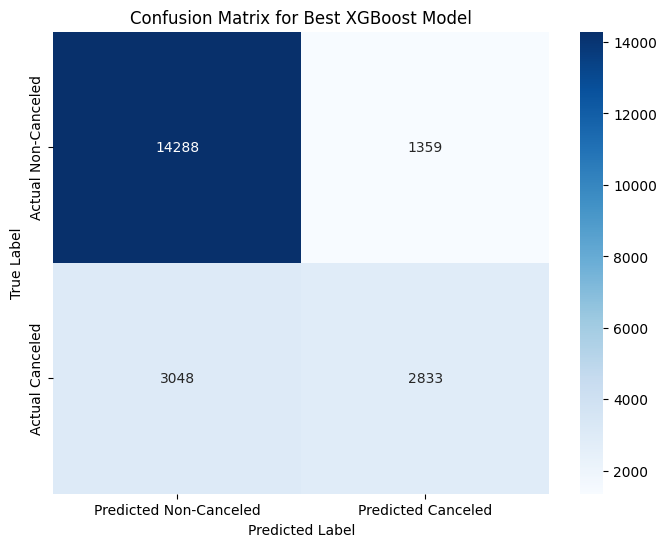

In [49]:
# Confusion matrix and classification report for test
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Report
print("\nClassification Report for Best XGBoost Model:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC on Test Set for Best XGBoost Model:", roc_auc_score(y_test, y_pred_lr))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Non-Canceled', 'Actual Canceled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best XGBoost Model')
plt.show()

In [50]:
# Process the unseen data using the same preprocessor as the model
unseen_data_processed = preprocessor.transform(unseen_data[features])

# Make predictions (class labels) using the best XGBoost model
unseen_data_predictions = lr_temp_pipeline.predict(unseen_data[features]) # Use the original features of unseen_data for pipeline

# Get prediction probabilities for AUC-ROC if needed, although for this display, class labels are enough
unseen_data_probabilities = lr_temp_pipeline.predict_proba(unseen_data[features])[:, 1]

# Display unseen data with predictions and actual values
unseen_data_with_predictions = unseen_data.copy()
unseen_data_with_predictions['predicted_is_canceled'] = unseen_data_predictions
unseen_data_with_predictions['predicted_probability_canceled'] = unseen_data_probabilities

print("Unseen Data with Predictions:")
display(unseen_data_with_predictions[['is_canceled', 'predicted_is_canceled', 'predicted_probability_canceled'] + features])

# Optionally, you can calculate performance metrics for the unseen data if you have ground truth
print("\nPerformance on Unseen Data:")
print(classification_report(unseen_data['is_canceled'], unseen_data_predictions))
print("AUC-ROC on Unseen Data:", roc_auc_score(unseen_data['is_canceled'], unseen_data_probabilities))


Unseen Data with Predictions:


,is_canceled,predicted_is_canceled,predicted_probability_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guest
12410,1,1,0.773739,Resort Hotel,310,2017,June,26,27,2,...,Other,Other,0,No Deposit,0,Transient,160.43,0,0,3
77577,0,0,0.099352,City Hotel,2,2015,October,43,18,2,...,A,A,0,No Deposit,0,Transient,65.00,0,0,1
26827,0,0,0.028050,Resort Hotel,5,2016,August,33,11,0,...,A,D,0,No Deposit,0,Transient,189.00,0,0,2
86076,0,0,0.185657,City Hotel,75,2016,March,13,24,0,...,D,D,0,No Deposit,0,Transient,114.30,0,1,2
54677,1,0,0.446772,City Hotel,61,2016,July,30,23,1,...,A,A,0,No Deposit,0,Transient,105.30,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71609,1,1,0.640153,City Hotel,63,2017,July,28,9,2,...,D,D,0,No Deposit,0,Transient,180.00,0,0,3
114698,0,0,0.160660,City Hotel,184,2017,June,25,23,1,...,A,A,0,No Deposit,0,Transient,89.10,0,0,2
106015,0,0,0.180426,City Hotel,154,2017,February,7,17,0,...,A,A,0,No Deposit,0,Transient,75.00,0,0,2
20821,0,0,0.027387,Resort Hotel,7,2016,February,7,9,0,...,A,A,0,No Deposit,0,Transient-Party,37.00,0,0,1



Performance on Unseen Data:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       762
           1       0.60      0.48      0.53       238

    accuracy                           0.80      1000
   macro avg       0.73      0.69      0.70      1000
weighted avg       0.79      0.80      0.79      1000

AUC-ROC on Unseen Data: 0.8245384768080459
